# Numerical Solutions of Partial Differential Equations

<font color='blue'>Calculus</font>, particularly <font color='blue'>Partial Differential Equations</font> (PDEs), has been a <font color='blue'>cornerstone</font> of <font color='blue'>mathematical modeling</font> in engineering and science. Over the past century, the <font color='blue'>theoretical study of PDEs</font> has achieved <font color='blue'>remarkable success</font>, advancing our understanding of complex phenomena. However, as the demand for precise and detailed quantitative solutions grows, <font color='blue'>alternative tools</font> have become <font color='blue'>necessary</font> to meet the <font color='blue'>needs of practitioners</font>.

The advent of <font color='blue'>modern computing</font> in the <font color='blue'>1950s</font> revolutionized the field, making the numerical simulation of PDEs a feasible and practical approach. Over the <font color='blue'>last 70 years</font>, a <font color='blue'>wide range of algorithms</font> has been <font color='blue'>developed</font> for this purpose, offering speed, robustness, and accuracy. Key methods include:

1. Finite Difference Methods [1-4]
2. Finite Element Methods [5-8]
3. Spectral Element Methods [9-14]
4. Boundary Integral/Element Methods [15-16]

Despite significant achievements in creating robust and adaptable solvers for a wide variety of problems, the pursuit of <font color='blue'>faster, more efficient techniques</font> remains <font color='blue'>ongoing</font>. In recent years, <font color='blue'>practitioners</font> have been <font color='blue'>exploring machine learning-based solvers</font> as a potential method of addressing increasingly complex and subtle issues in the field. Some ML based methods include:

1. Neural Operator Learning (FNOs, DeepONet) [17-20]
2. Variational Autoencoders [21-22]
3. Graph Neural Networks (GNNs) [23-24]

Many others are being developed (some of which are included in [this Github repository](https://github.com/xiaoyuxie-vico/Awesome-ML-PDE) [25]).

# Physics-Informed Neural Networks

Machine learning is gaining traction in scientific disciplines, but can these <font color='blue'>algorithms truly understand</font> the <font color='blue'>scientific problems</font> they <font color='blue'>aim to solve</font>? Physics-informed neural networks (<font color='blue'>PINNs</font>) is a technique that <font color='blue'>integrates physical laws</font> into <font color='blue'>machine learning models</font> [26], thereby <font color='blue'>combining</font> empirical <font color='blue'>data</font> with <font color='blue'>scientific principles</font>.


## Machine Learning in Science

<font color='blue'>Machine learning</font> has brought about a <font color='blue'>paradigm shift</font> in <font color='blue'>scientific methodology</font>. <font color='blue'>Traditionally</font>, scientific research has relied on the <font color='blue'>iterative refinement of theories</font> through experimental data. In this approach, a <font color='blue'>well-defined theoretical model</font> is <font color='blue'>tested</font> and <font color='blue'>modified</font> as <font color='blue'>new experimental results emerge</font>, guiding further predictions.

With the <font color='blue'>rapid development</font> of <font color='blue'>machine learning technologies</font> and the <font color='blue'>increasing availability</font> of <font color='blue'>data</font>, <font color='blue'>data-driven approaches</font> have become <font color='blue'>prevalent</font>. In this framework, a <font color='blue'>pre-existing theory</font> is <font color='blue'>not</font> a <font color='blue'>prerequisite</font>. Instead, <font color='blue'>machine learning algorithms</font> are <font color='blue'>trained on data</font> to analyze a scientific problem without explicit reliance on theoretical constructs.


## Learning to model experimental data

One way in which <font color='blue'>machine learning</font> can be applied in <font color='blue'>scientific research</font> is by <font color='blue'>modeling experimental data</font>. Consider an example where experimental <font color='blue'>data points</font> represent an <font color='blue'>unknown physical phenomenon</font>, such as the <font color='blue'>orange points</font> in the animation below.

![](https://benmoseley.blog/wp-content/uploads/2021/08/nn.gif)

A <font color='blue'>popular method</font> for this task is the use of a <font color='blue'>neural network</font>. Given the <font color='blue'>position</font> of a <font color='blue'>data point $x$</font>, a neural network can be used to <font color='blue'>predict</font> its <font color='blue'>corresponding value $u$</font>, as illustrated in the figure below.

![size=0.7](https://benmoseley.blog/wp-content/uploads/2021/08/nn.png)

To <font color='blue'>train</font> the network, its <font color='blue'>free parameters $(\theta_j)$ are adjusted</font> so that the <font color='blue'>predictions</font> closely <font color='blue'>align</font> with the <font color='blue'>provided data</font>. This is typically <font color='blue'>achieved</font> by <font color='blue'>minimizing</font> the <font color='blue'>mean squared error</font> (MSE) between the network's predictions and the true data values:

$$ \underset{\text{Data Loss}}{\min \underbrace{\frac{1}{N}\sum_i^N \left(u_{NN}(x_i;\theta) - u_{\text{true}}(x_i)\right)^2}}. $$

After training, the <font color='blue'>network</font> can <font color='blue'>fit the experimental data</font>, as shown in the animation above.

## Limitations of purely data-driven approaches

While <font color='blue'>data-driven methods</font> can be <font color='blue'>effective within</font> the <font color='blue'>range</font> of <font color='blue'>available data</font>, they <font color='blue'>often struggle</font> to <font color='blue'>generalize beyond the training data</font>. For example, in the animation above, the grey line represents the actual values of the physical process that generated the experimental data. It is evident that the neural network performs well near the training data but fails to capture the true behavior of the system in regions without data. This limitation reveals that a <font color='blue'>purely data-driven approach</font> may <font color='blue'>not fully capture</font> the <font color='blue'>underlying scientific phenomena</font>.


## The rise of scientific machine learning (SciML)

Now, consider that we have <font color='blue'>prior knowledge</font> about the <font color='blue'>physical process governing</font> the </font>data</font>. Specifically, the </font>data points</font> correspond to the </font>position of a damped harmonic oscillator</font>, a well-known problem in physics.

![](https://benmoseley.blog/wp-content/uploads/2021/08/oscillator.gif)

The <font color='blue'>dynamics of this system</font> can be described by the following <font color='blue'>second-order differential equation</font>:

$$ m\frac{d^2 u}{dx^2} + \mu \frac{du}{dx} + ku = 0 $$

where $m$ represents the mass of the oscillator, $\mu$ is the damping coefficient, and $k$ is the spring constant. Recognizing the <font color='blue'>limitations of purely data-driven models</font>, researchers are now <font color='blue'>integrating</font> such <font color='blue'>prior scientific knowledge</font> into <font color='blue'>machine learning workflows</font>, leading to the development of scientific machine learning (SciML) approaches. These approaches <font color='blue'>aim</font> to <font color='blue'>combine data</font> with well-established <font color='blue'>physical principles</font>.


## So, what exactly is a physics-informed neural network?

A <font color='blue'>physics-informed neural network</font> (PINN) [27-29] provides a way to <font color='blue'>incorporate known physical laws</font>, such as differential equations, directly into the neural network's <font color='blue'>training process</font>. The concept is straightforward: in <font color='blue'>addition</font> to <font color='blue'>minimizing the error</font> between predictions and data, we also <font color='blue'>introduce</font> the <font color='blue'>governing physical equations</font> into the network's <font color='blue'>loss function</font>.

The process <font color='blue'>begins</font> by <font color='blue'>sampling a set of input locations</font> ($x_j$) and <font color='blue'>passing them</font> through <font color='blue'>the neural network</font>. The gradients of the network's output with respect to its inputs are computed (using techniques such as [automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation)), and these <font color='blue'>gradients</font> are used to <font color='blue'>calculate the residuals</font> of the <font color='blue'>differential equation</font>. This <font color='blue'>residual</font> is then <font color='blue'>added</font> to the <font color='blue'>loss function</font> as a <font color='blue'>physics-based regularization term</font>.

![size=0.8](https://benmoseley.blog/wp-content/uploads/2021/08/pinn.png)

For the <font color='blue'>damped harmonic oscillator</font>, this leads to a loss function of the form:

$$ \underset{\text{Data Loss}}{\min \underbrace{\frac{1}{N}\sum_i^N \left(u_{NN}(x_i;\theta) - u_{\text{true}}(x_i)\right)^2}} + \underset{\text{Physical Loss}}{\underbrace{\frac{1}{M}\sum_j^M \left(\left[m\frac{d}{dx^2} + \mu \frac{d}{dx} + k\right]u_{NN}(x_j;\theta)\right)^2}} $$

This <font color='blue'>additional term</font> ensures that the <font color='blue'>neural network's learned solution</font> adheres to the <font color='blue'>physical constraints</font> imposed by the known differential equation.
![](https://benmoseley.blog/wp-content/uploads/2021/08/pinn.gif)

## Remarks

By incorporating <font color='blue'>physical laws</font> into the <font color='blue'>training process</font>, PINNs can <font color='blue'>generalize better</font> to <font color='blue'>regions</font> where <font color='blue'>no data is available</font>, as demonstrated in the case of the damped harmonic oscillator. The physics-informed model is capable of <font color='blue'>accurately predicting</font> the <font color='blue'>system's behavior far from the experimental data points</font>, outperforming purely data-driven models.

The <font color='blue'>poor performance</font> of the <font color='blue'>naive network</font> can be attributed to its <font color='blue'>reliance</font> on <font color='blue'>data alone</font>, effectively ignoring the wealth of existing scientific knowledge. In contrast, the PINN leverages this knowledge, leading to superior predictive accuracy.

PINNs are <font color='blue'>broadly applicable</font> to <font color='blue'>any problem governed by differential equations</font>, making them a versatile tool in scientific machine learning. For more information, one can explore the growing field of [scientific machine learning (SciML)](https://www.osti.gov/biblio/1478744) and the role of [automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) in neural network training.


# Example 1: One-Dimensional Damped Oscillator with Sinusoidal Forcing

We now explore the dynamics of a <font color='blue'>damped oscillator</font> subjected to <font color='blue'>sinusoidal forcing</font>. This system can be modeled by a first-order ordinary differential equation that captures the behavior of the oscillator under the influence of damping and an external periodic force. The ODE is

 $$\begin{cases}
 \dfrac {dy} {dt} + 0.1 y - \sin\left(\dfrac{\pi t}{2}\right) = 0,& ~t\in[0,30]\\
 y(0)=1,& ~\text{at}~ t=0
 \end{cases}$$

 where

- $y(t)$ represents the <font color='blue'>displacement</font> of the <font color='blue'>oscillator</font> at time $t$.
- the second term $0.1y$ represents <font color='blue'>damping</font> with a damping coefficient of $0.1$.
- the last term $- \sin\left({\pi t}/{2}\right)$ represents a <font color='blue'>sinusoidal forcing function</font> acting on the oscillator.

We will first simulate the response of the damped oscillator over the time interval $[0,30]$ seconds using a <font color='blue'>2nd-order trapezoidal integration scheme</font>. We will then create a <font color='blue'>fully connected neural network</font> (FCN) to <font color='blue'>approximate the solution</font> and compare it with the exact solution. The training process will <font color='blue'>minimize the mean squared error</font> between the neural network predictions and the exact solution. Afterwards, the error will be compared against <font color='blue'>adding more information</font> to the <font color='blue'>neural network</font> through the <font color='blue'>physical loss</font> (PDE residual) in a PINN.

Let's set up our environment.

In [ ]:
%%capture
!conda create -n pinn python=3
!conda activate pinn
!conda install jupyter numpy matplotlib
!conda install pytorch torchvision torchaudio -c pytorch
!pip install ipywidgets

In [ ]:
from PIL import Image
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import time
import ipywidgets as widgets
import pylab as pl
from IPython import display
from IPython.display import clear_output

In [ ]:
def dampedOscillator():
    """
    Simulates a damped oscillator using a second-order trapezoidal integration scheme.

    The oscillator is simulated over a time interval [0, 30] with damping and sinusoidal forcing.
    The integration is done using 3,000 time steps.

    Returns
    -------
    tPoints : torch.Tensor
        Time points for the simulation (shape: [n_steps, 1]).
    y : torch.Tensor
        State variable (displacement) at each time step (shape: [n_steps, 1]).
    """
    nSteps=3000              # Number of time steps
    tMin,tMax = 0.0,30.0      # Time domain
    tStep = (tMax-tMin)/nSteps   # Time step
    tPoints = np.arange(tMin, tMax, tStep) # Array of time points

    # Set initial conditions for the state variables
    y0 = 1.0
    y = [y0] # Initialize displacement

    # Solve forward in time
    for t in tPoints[1:]:
        tdemi= t - tStep/2 # Midpoint time
        # Estimate the value of y at the midpoint using the previous state
        ydemi = y[-1] + tStep/2*( - 0.1*y[-1] + np.sin(np.pi*tdemi/2))
        # Compute the next state using the midpoint estimate
        y.append(y[-1] + tStep * (- 0.1*ydemi + np.sin(np.pi*t/2)))

    y = torch.Tensor(y)

    return torch.Tensor(tPoints).view(-1, 1), torch.Tensor(y).view(-1, 1)


class FCN(nn.Module):
    """
    Fully Connected Neural Network (FCN).

    Parameters
    ----------
    n_input : int
        The number of input features.
    n_output : int
        The number of output features.
    n_hidden : int
        The number of hidden units per layer.
    n_layers : int
        The number of hidden layers in the network.
    """
    def __init__(self, n_input, n_output, n_hidden, n_layers):
        super().__init__()
        activation = nn.Tanh
        # First fully connected layer with input and hidden units
        self.fcs = nn.Sequential(*[nn.Linear(n_input, n_hidden),activation()])
        # Stack of hidden layers
        self.fch = nn.Sequential(*[nn.Sequential
                                   (*[nn.Linear(n_hidden, n_hidden), activation()])
                                   for _ in range(n_layers-1)])
        # Output layer
        self.fce = nn.Linear(n_hidden, n_output)

    def forward(self, x):
        """
        Forward pass through the network.

        Parameters
        ----------
        x : torch.Tensor
            Input tensor.

        Returns
        -------
        torch.Tensor
            Output tensor after passing through the network.
        """
        x = self.fcs(x) # Apply the first layer
        x = self.fch(x) # Pass through the hidden layers
        x = self.fce(x) # Output layer
        return x

We will also generate training data.

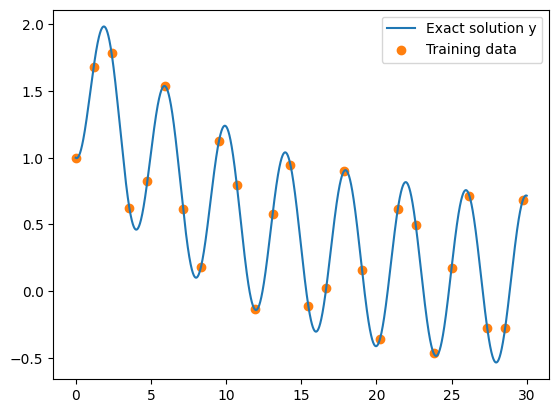

In [ ]:
# Exact solution and training data
x, y = dampedOscillator()
x = x[::1]
y = y[::1]
x_data=x[0:3000:119]
y_data=y[0:3000:119]


plt.figure()
plt.plot(x, y, label="Exact solution y")
plt.scatter(x_data, y_data, color="tab:orange", label="Training data")
plt.legend()
plt.show()

Next, let's try using a <font color='blue'>fully connected neural network</font> to fit the training points. We will find that the network is <font color='blue'>able to fit</font> the solution <font color='blue'>very closely</font> in the <font color='blue'>vicinity of the training points</font>, but does not learn an accurate solution outside of them.

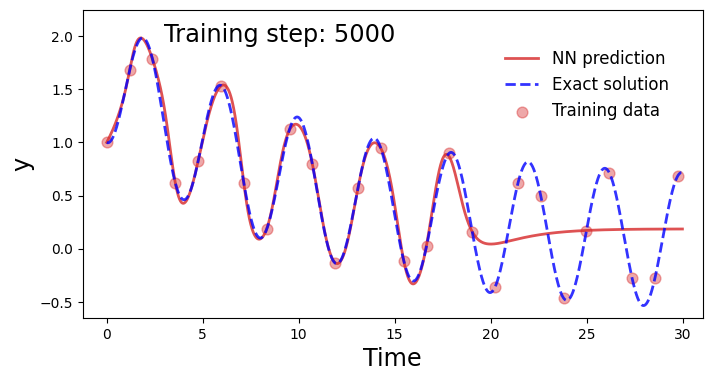

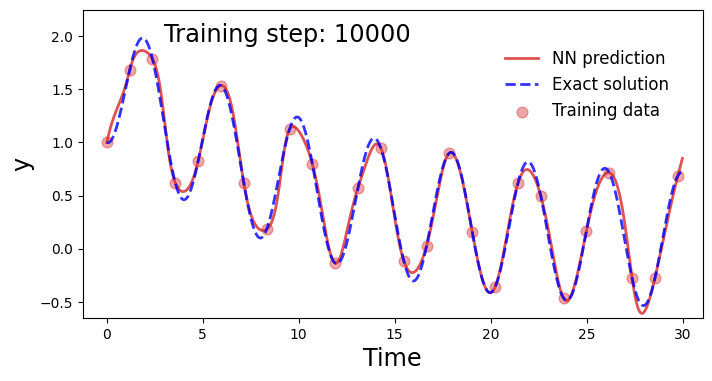

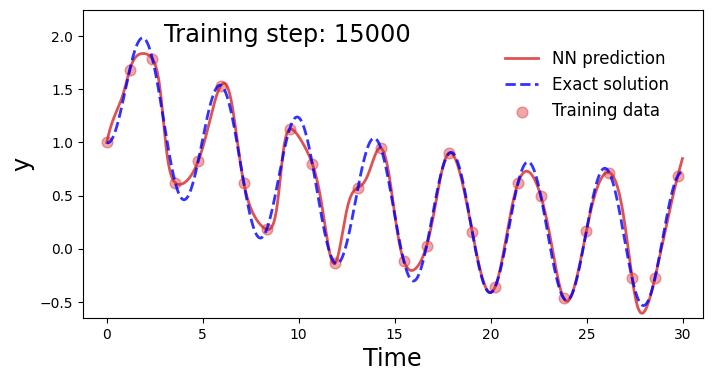

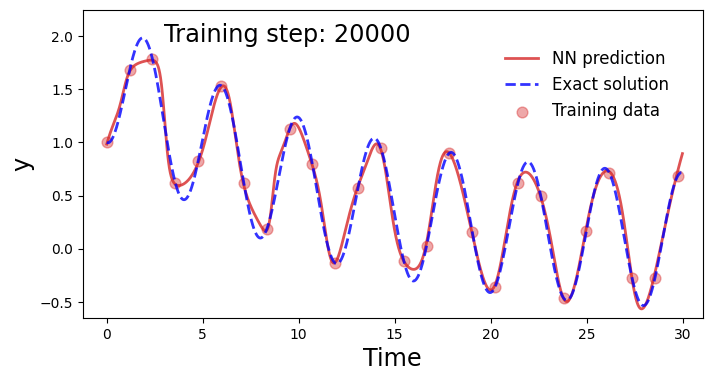

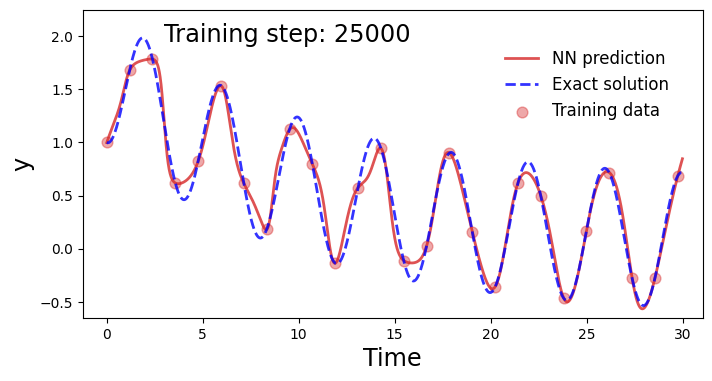

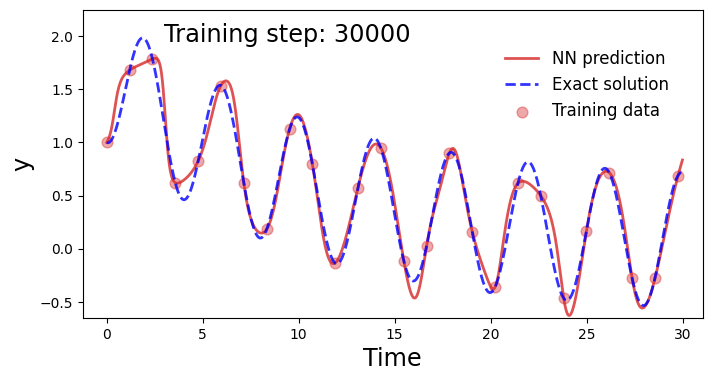

In [ ]:
# Training setup with FCN
def plot_result_NN(x, y, x_data, y_data, yh, cp=None):
    """
    Plots the training results of the neural network against the exact solution.

    Parameters
    ----------
    x : array-like
        Time points for the solution (shape: [n_points, 1]).
    y : array-like
        Exact solution at each time point (shape: [n_points, 1]).
    x_data : array-like
        Time points for the training data (shape: [n_data_points, 1]).
    y_data : array-like
        Training data values (shape: [n_data_points, 1]).
    yh : array-like
        Neural network prediction at each time point (shape: [n_points, 1]).
    cp : boolean, optional
        Adds collocation points to plot (default is None).
    """
    plt.figure(figsize=(8,4))
    plt.plot(x,yh, color="tab:red", linewidth=2, alpha=0.8, label="NN prediction")
    plt.plot(x,y, color="blue", linewidth=2, alpha=0.8,linestyle='--',label="Exact solution")
    plt.scatter(x_data, y_data, s=60, color="tab:red", alpha=0.4, label='Training data')
    if cp is not None:
      plt.scatter(cp, -0*torch.ones_like(cp), s=30, color="tab:green", alpha=0.4, label='Collocation points')
    l = plt.legend(loc=(0.67,0.62), frameon=False, fontsize="large")
    plt.setp(l.get_texts(), color="k")
    plt.xlim(-1.25, 31.05)
    plt.ylim(-0.65, 2.25)
    plt.text(2.965,1.95,"Training step: %i"%(i+1),fontsize="xx-large",color="k")
    plt.ylabel('y',fontsize="xx-large")
    plt.xlabel('Time',fontsize="xx-large")
    plt.axis("on")

# Training setup
torch.manual_seed(123)
model = FCN(1, 1, 32, 3)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-3)

# Store loss history
lossNN_history = []

for i in range(30000):
    optimizer.zero_grad() # Zero out the gradients
    yh = model(x_data)

     # Compute the loss using mean squared error
    loss = torch.mean((yh - y_data) ** 2)
    loss.backward() # Backpropagate the loss
    optimizer.step() # Update the model parameters

    # Store loss every 100 iterations and predictions every 5000 iterations
    if (i + 1) % 100 == 0:
        lossNN_history.append(loss.detach())
        yh = model(x).detach()
        plot_result_NN(x,y,x_data,y_data,yh)

        if (i+1) % 5000 == 0:
          plt.show()
        else:
          plt.close("all")

We also examine the training loss.

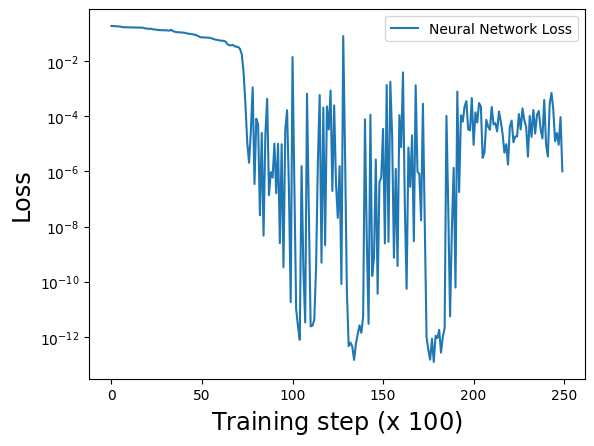

In [ ]:
fig11 = plt.figure()
plt.plot(lossNN_history, label='Neural Network Loss')
plt.xlabel('Training step (x $100$)', fontsize="xx-large")
plt.ylabel('Loss', fontsize="xx-large")
plt.yscale('log')
plt.legend()
plt.show()

Next, let's do the <font color='blue'>same procedure</font> with a <font color='blue'>PINN</font>. The <font color='blue'>physical loss</font> aims to ensure that the <font color='blue'>learned solution</font> is <font color='blue'>consistent</font> with the <font color='blue'>underlying differential equation</font>. This is done by <font color='blue'>penalising the residual</font> of the differential equation over a set of locations sampled from the domain.

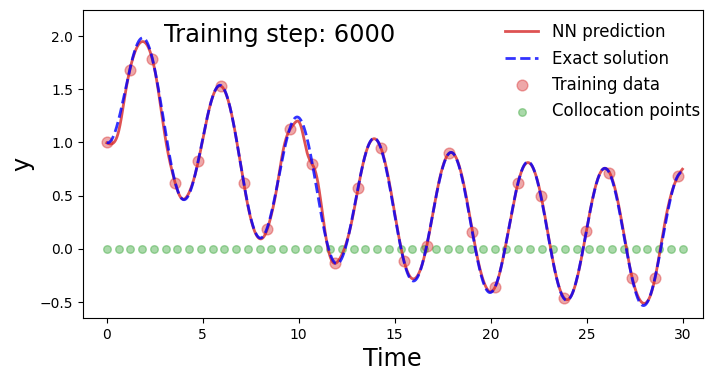

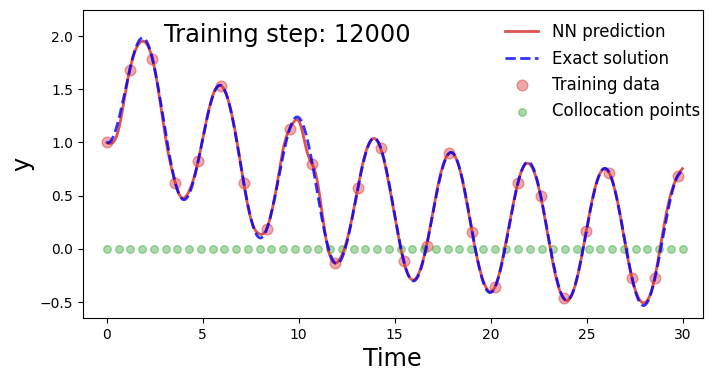

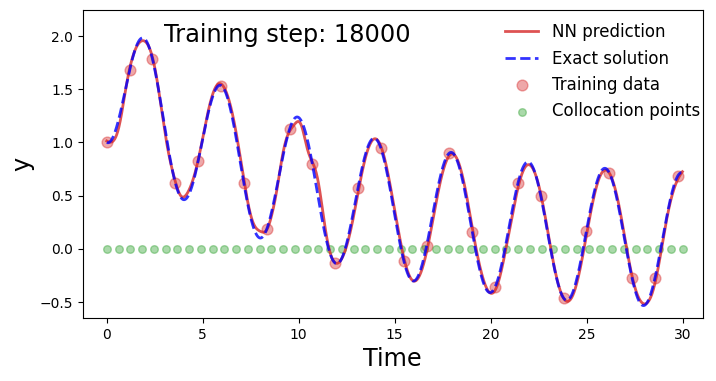

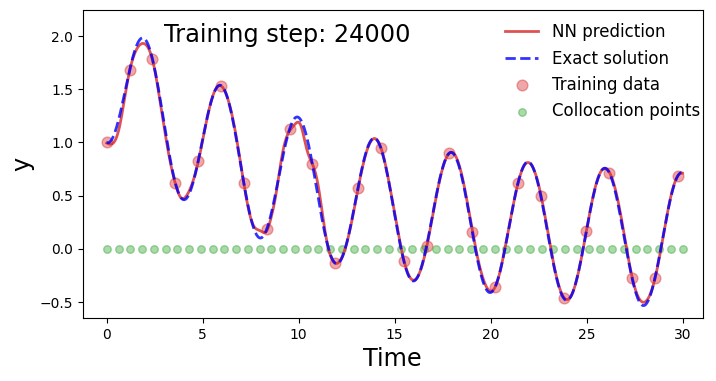

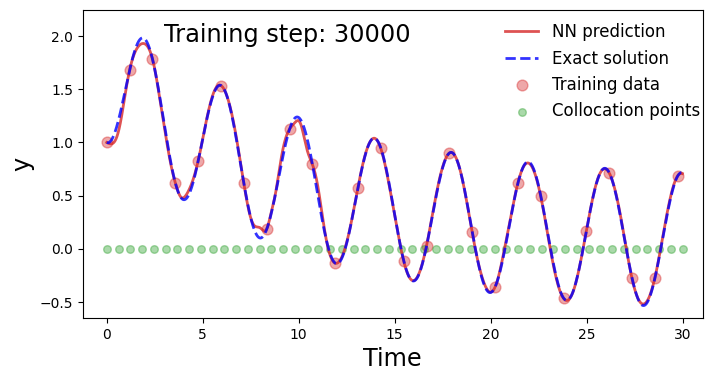

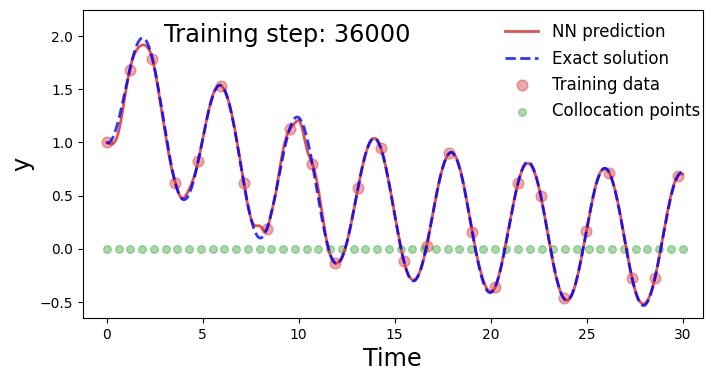

In [ ]:
# Collocation point setup
col_pts = torch.linspace(0, 30, 50).view(-1, 1).requires_grad_(True)  # Sample locations over the domain
lam = 0.1

# Store loss history and predictions
loss_history = []
loss2_history = []
predictions = []

for i in range(40000):
    optimizer.zero_grad() # Zero out the gradients

    # Compute the data loss (MSE between predicted and actual data)
    yh = model(x_data)
    loss1 = torch.mean((yh - y_data) ** 2)  # Use mean squared error

    # Compute the physical loss (PDE residual)
    yhp = model(col_pts)
    dx = torch.autograd.grad(yhp, col_pts, torch.ones_like(yhp), create_graph=True)[0]
    residual = (dx + lam * yhp - torch.sin(np.pi * col_pts / 2))
    loss2 = (6e-2) * (torch.mean(residual ** 2))

    # Combine the data and physical loss
    loss = loss1 + loss2 # Total loss = data loss + physical loss
    loss.backward() # Backpropagate the total loss
    optimizer.step() # Update the model parameters

    # Store loss every 100 iterations and predictions every 5000 iterations
    if (i + 1) % 100 == 0:
        loss_history.append(loss.detach())
        loss2_history.append(loss2.detach())

        yh = model(x).detach()
        cp = col_pts.detach()
        plot_result_NN(x,y,x_data,y_data,yh,cp)

        if (i+1) % 6000 == 0:
          plt.show()
        else:
          plt.close("all")


We then examine the training loss from the data loss and physical loss.

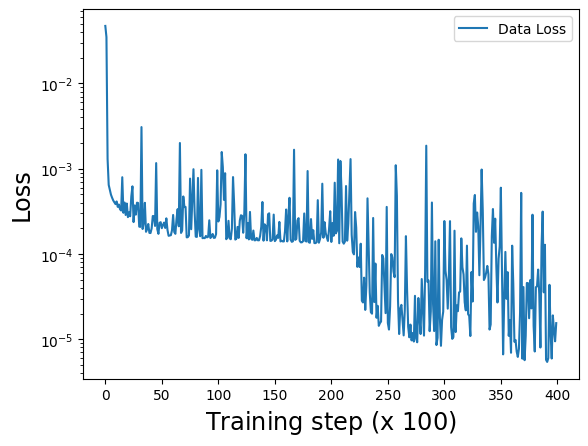

In [ ]:
fig12 = plt.figure()
plt.plot(loss_history, label='Data Loss')
plt.xlabel('Training step (x $100$)', fontsize="xx-large")
plt.ylabel('Loss', fontsize="xx-large")
plt.yscale('log')
plt.legend()
plt.show()

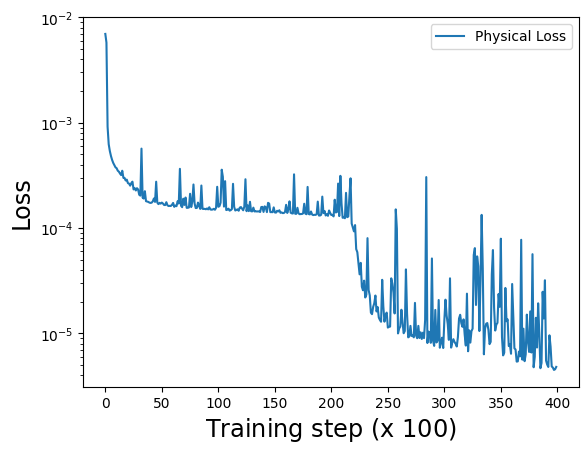

In [ ]:
fig13 = plt.figure()
plt.plot(loss2_history, label="Physical Loss")
plt.xlabel('Training step (x $100$)', fontsize="xx-large")
plt.ylabel('Loss', fontsize="xx-large")
plt.yscale('log')
plt.legend()
plt.show()

# Example 2: Two-Dimensional Helmholtz Equation

We now examine the <font color='blue'>2D Helmholtz</font> Boundary Value Problem:

 $$\begin{cases}
 \Delta u + k^2 u = 0, &~\text{in} ~\Omega \\
 u(x)=g(x), &~\text{on}~\partial\Omega
 \end{cases}$$

 where $x=(x_1,x_2)\in\mathbb R^2$, $~\Omega\subset\mathbb R^2$ is bounded, and $k$ is the wave number.  In this problem, $\Delta u$ represents the <font color='blue'>Laplacian operator</font>, which in 2D is given by:

 $$ \Delta u = \frac{\partial^2u}{\partial x_1^2} + \frac{\partial^2u}{\partial x_2^2}.$$

 Our objective is to <font color='blue'>solve for $u(x)$</font> within the <font color='blue'>domain $\Omega$</font> subject to the <font color='blue'>boundary condition $u(x) = g(x)$ on $\partial \Omega$</font>. To numerically solve this problem, we discretize the domain $\Omega$ into a 2D grid of points using using <font color='blue'>boundary points<font> and <font color='blue'>collocation points within the domain</font>.

We will start by importing the necessary libraries.

In [ ]:
%%capture
!pip install pyDOE

In [ ]:
import numpy as np
import torch
import torch.autograd as autograd         # Computation graph
from torch import Tensor                  # Tensor node in the computation graph
import torch.nn as nn                     # Neural networks
import torch.optim as optim               # Optimizers for gradient descent, ADAM, etc.
import time
from pyDOE import lhs                     # Latin Hypercube Sampling
import matplotlib.pyplot as plt

# Set default dtype to float32
torch.set_default_dtype(torch.float)

# PyTorch random number generator
torch.manual_seed(1234)

# NumPy random number generator
np.random.seed(1234)

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"Using device: {device}")

Using device: cuda


The next step involves preparing data points for training and testing the PINN model. The function <font color='blue'>`prepare_training_data`</font> selects boundary points and collocation points within the domain for the PINN model. The <font color='blue'>collocation points</font> are <font color='blue'>crucial</font> to <font color='blue'>enforcing the physics</font> of the problem.

In [ ]:
def create_grid(num_grid_pts=256, n_dim=2):
    """
    Creates an n-dimensional grid of points as a NumPy array.

    Parameters
    ----------
    num_grid_pts : int, optional
        The number of grid points along each dimension (default is 256).
    n_dim : int, optional
        The number of dimensions (default is 2).

    Returns
    -------
    grid : np.ndarray
        n-dimensional grid points as a NumPy array.
    axis_points : list of np.ndarray
        List of 1D arrays of points for every dimension.
    """
    # Form 1D arrays for every dimension
    axis_points = [np.linspace(0, np.pi, num_grid_pts) for _ in range(n_dim)]

    # Generate a meshgrid up to n_dim
    grids = np.meshgrid(*axis_points, indexing='ij', sparse=False)

    return grids, axis_points


def prepare_test_data(X, Y):
    """
    Prepare test data by flattening the 2D grids and stacking them column-wise.

    Parameters
    ----------
    X : np.ndarray
        2D grid points in the x-dimension as a NumPy array.
    Y : np.ndarray
        2D grid points in the y-dimension as a NumPy array.

    Returns
    -------
    X_u_test : np.ndarray
        Test data prepared by stacking the flattened x and y grids.
    lb : np.ndarray
        Lower bound for the domain (boundary conditions).
    ub : np.ndarray
        Upper bound for the domain (boundary conditions).
    """
    # Flatten the grids and stack them into a 2D array
    X_u_test = np.hstack((X.flatten()[:, None], Y.flatten()[:, None]))

    # Domain bounds as NumPy arrays
    lb = np.array([0, 0], dtype=np.float32)
    ub = np.array([np.pi, np.pi], dtype=np.float32)

    return X_u_test, lb, ub


def prepare_training_data(N_u, N_f, lb, ub, usol, X, Y):
    """
    Prepare boundary condition data and collocation points for training.

    Parameters
    ----------
    N_u : int
        Number of boundary condition points to select.
    N_f : int
        Number of collocation points for the physics-informed model.
    lb : np.ndarray
        Lower bound for the domain.
    ub : np.ndarray
        Upper bound for the domain.
    usol : np.ndarray
        Analytical solution of the PDE.
    X : np.ndarray
        X grid of points.
    Y : np.ndarray
        Y grid of points.

    Returns
    -------
    collocation_points : np.ndarray
        Collocation points in the domain.
    boundary_points : np.ndarray
        Boundary condition points.
    boundary_values : np.ndarray
        Corresponding boundary condition values.
    """
    # Boundary points from all four edges
    boundary_points_edges = np.vstack((
        np.hstack((X[:, 0][:, None], Y[:, 0][:, None])),
        np.hstack((X[:, -1][:, None], Y[:, -1][:, None])),
        np.hstack((X[0, :][:, None], Y[0, :][:, None])),
        np.hstack((X[-1, :][:, None], Y[-1, :][:, None]))
    ))

    # Boundary values (analytical solution at boundary points)
    boundary_values_edges = np.vstack((
        usol[:, 0][:, None],
        usol[:, -1][:, None],
        usol[0, :][:, None],
        usol[-1, :][:, None]
    ))

    # Randomly select N_u boundary points
    idx = np.random.choice(boundary_points_edges.shape[0], N_u, replace=False)
    boundary_points = boundary_points_edges[idx, :]
    boundary_values = boundary_values_edges[idx, :]

    # Generate N_f collocation points using Latin Hypercube Sampling
    collocation_points = lb + (ub - lb) * lhs(2, N_f)  # Collocation points in [lb, ub]

    return collocation_points, boundary_points, boundary_values


def visualize_training_data(collocation_points, boundary_points, boundary_values):
    """
    Visualizes the boundary points and collocation points on a π × π square domain.

    Parameters
    ----------
    collocation_points : np.ndarray
        Collocation points to visualize.
    boundary_points : np.ndarray
        Boundary points to visualize.
    boundary_values : np.ndarray
        Corresponding boundary condition values.
    """
    plt.figure(figsize=(8, 8))

    # Plot boundary points
    plt.scatter(boundary_points[:, 0], boundary_points[:, 1], color='red', label='Boundary Points', alpha=0.6)

    # Plot collocation points
    plt.scatter(collocation_points[:, 0], collocation_points[:, 1], color='blue', label='Collocation Points', alpha=0.3)

    # Plot the π × π square
    square = plt.Rectangle((0, 0), np.pi, np.pi, edgecolor='green', fill=False, label='π-Square')
    plt.gca().add_artist(square)

    plt.xlim([0, np.pi])
    plt.ylim([0, np.pi])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14)
    plt.title('Boundary and Collocation Points inside the π-Square')
    plt.legend()
    plt.grid()
    plt.show()

The PINN architecture approximates the solution $u(x)$ by minimizing two losses:

- The <font color='blue'>data loss</font>, which penalizes <font color='blue'>deviation from boundary conditions</font>.
- The <font color='blue'>PDE loss</font>, which ensures that the solution <font color='blue'>satisfies the Helmholtz equation</font>.

The PDE residual $r(x)$ can be written as:

$$r(x)=\Delta u+k^2u-f(x)$$

This residual measures how much the <font color='blue'>predicted solution deviates</font> from satisfying the PDE exactly.

In the context of PINNs, the PDE residual is calculated using automatic differentiation, and our goal is to minimize this residual across our domain through training the neural network.

The architecture uses several fully connected layers, with the final layer representing the approximation of $u(x)$.

In [ ]:
class HelmholtzPINN(nn.Module):
    """
    A neural network for solving data (boundary condition) loss and partial
    differential equation (residual) loss for the 2D Helmholtz equation in PyTorch.

    Parameters
    ----------
    layers : list
        A list defining the number of nodes in each layer of the network.
    """

    def __init__(self, layers):
        """
        Initializes the SequentialModel with the specified layers, activation function,
        loss function, and weight initialization.

        Parameters
        ----------
        layers : list
            A list of integers where each element defines the number of neurons
            in the respective layer.
        """
        super().__init__()

        # LeakyReLU activation function
        self.activation = nn.LeakyReLU()

        # Mean squared error (MSE) loss function
        self.loss_function = nn.MSELoss(reduction='mean')

        # L1 loss (mean absolute error) function
        self.l1loss_function = nn.L1Loss(reduction='mean')

        # Initialize the network as a list of linear layers
        self.linears = nn.ModuleList([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers)-1)])

        # Xavier normal initialization for weights and setting biases to zero
        for i in range(len(layers) - 1):
            nn.init.xavier_normal_(self.linears[i].weight.data, gain=1.0)
            nn.init.zeros_(self.linears[i].bias.data)

    def forward(self, x):
        """
        Forward pass through the network. Scales the input features and passes them through
        the layers of the model, applying the activation function after each layer.

        Parameters
        ----------
        x : torch.Tensor or numpy array
            Input tensor or array to be processed.

        Returns
        -------
        torch.Tensor
            Output of the model.
        """
        # Convert numpy array to tensor if needed
        if not torch.is_tensor(x):
            x = torch.from_numpy(x)

        # Convert lower and upper bounds to tensors
        u_b = torch.from_numpy(ub).float().to(device)
        l_b = torch.from_numpy(lb).float().to(device)

        # Feature scaling
        x = (x - l_b) / (u_b - l_b)

        # Convert input to float
        a = x.float()

        # Pass through each linear layer with activation
        for i in range(len(self.linears) - 1):
            z = self.linears[i](a)
            a = self.activation(z)

        # Final layer without activation
        a = self.linears[-1](a)

        return a

    def loss_PDE(self, x_to_train_f, k):
        """
        Computes the partial differential equation (PDE) loss using automatic differentiation
        to calculate the second-order derivatives.

        Parameters
        ----------
        x_to_train_f : torch.Tensor
            Input tensor for training PDE.
        k : int
            Wave number of the Helmholtz equation.

        Returns
        -------
        torch.Tensor
            Loss value for the PDE.
        """
        x_1_f = x_to_train_f[:, [0]]
        x_2_f = x_to_train_f[:, [1]]

        g = x_to_train_f.clone()
        g.requires_grad = True

        # Forward pass through the network
        u = self.forward(g)

        # Compute first-order derivatives
        u_x = autograd.grad(u, g, torch.ones([x_to_train_f.shape[0], 1]).to(device),
                            retain_graph=True, create_graph=True)[0]

        # Compute second-order derivatives
        u_xx = autograd.grad(u_x, g, torch.ones(x_to_train_f.shape).to(device),
                             create_graph=True)[0]
        u_xx_1 = u_xx[:, [0]]
        u_xx_2 = u_xx[:, [1]]

        # Define the PDE residual
        q = k**2 * torch.sin(n * x_1_f) * torch.sin(m * x_2_f)
        f = u_xx_1 + u_xx_2 + k**2 * u - q

        # PDE loss
        return self.loss_function(f, f_hat)

    def test(self, X_test, u_true):
        """
        Test the model on the test data and computes the relative L2 norm of the error and the mean absolute error.

        Parameters
        ----------
        X_test : torch.Tensor
            Test points across the domain.
        u_true : torch.Tensor
            True solution values (ground truth) for comparison.

        Returns
        -------
        error_vec : torch.Tensor
            The relative L2 norm of the error.
        u_pred : numpy.ndarray
            The predicted solution.
        mae : torch.Tensor
            Mean absolute error between the predictions and the true values.
        """
        # Model prediction
        u_pred = self.forward(X_test)

        # Compute the relative L2 norm of the error
        error_vec = torch.linalg.norm(u_true - u_pred, 2) / torch.linalg.norm(u_true, 2)

        # Compute the mean absolute error (MAE)
        mae = torch.mean(torch.abs(u_true - u_pred))

        # Reshape the predicted output
        u_pred = np.reshape(u_pred.cpu().detach().numpy(), (num_grid_pts, num_grid_pts), order='F')

        return error_vec, u_pred, mae

We also define some training and plotting functions.

In [ ]:
def LBFGS_training():
    """
    Computes the loss and its gradients for use with the LBFGS optimizer.

    Necessary for optimizers which require multiple evaluations of the function. It performs the following:
    - Resets gradients to zero.
    - Calculates the loss using the physics-informed neural network (PINN) model.
    - Backpropagates the gradients of the loss.

    Returns
    -------
    loss : torch.Tensor
        The computed loss value.
    """
    # Zero out the gradients of the optimizer before backpropagation
    lbfgs_optimizer.zero_grad()

    # Forward pass for boundary condition points
    u_pred_train = PINN.forward(boundary_points)

    # Data loss (MSE between predicted and true boundary condition values)
    data_loss = PINN.loss_function(u_pred_train, boundary_values)

    # Physics loss (PDE residuals)
    physics_loss = PINN.loss_PDE(collocation_points, k)

    # Total loss: sum of data loss and physics loss
    total_loss = data_loss + physics_loss

    # Perform backpropagation to compute the gradients of the loss
    total_loss.backward()

    # Return the total loss value to the optimizer
    return total_loss


def plot_training_progress(train_losses, test_losses, train_maes, test_maes, steps):
    """
    Plot the training and test losses, along with the train and test MAEs, over the course of training.

    Parameters
    ----------
    train_losses : list
        List of training loss values recorded at each training step.
    test_losses : list
        List of test loss values recorded at each evaluation step.
    train_maes : list
        List of train MAE values recorded during training.
    test_maes : list
        List of test MAE values recorded during training.
    steps : list
        List of step numbers corresponding to the recorded losses and metrics.

    Returns
    -------
    None
    """
    plt.figure(figsize=(12, 8))

    # Plot training loss
    plt.plot(steps, train_losses, label='Train Loss (MSE)', color='blue', linestyle='-', marker='o')

    # Plot test loss
    plt.plot(steps, test_losses, label='Test Loss (MSE)', color='red', linestyle='--', marker='x')

    # Plot train MAE
    plt.plot(steps, train_maes, label='Train MAE', color='green', linestyle='-.', marker='s')

    # Plot test MAE
    plt.plot(steps, test_maes, label='Test MAE', color='orange', linestyle=':', marker='d')

    plt.xlabel('Steps', fontsize="x-large")
    plt.ylabel('MSE / MAE', fontsize="x-large")
    plt.legend()
    plt.title('Training Progress: MSE and MAE')

    plt.tight_layout()
    plt.yscale('log')
    plt.show()
    plt.pause(0.1)
    plt.savefig('training_progress.png', dpi=500, bbox_inches='tight')


def solutionplot(u_pred, usol, x_1, x_2, index, collocation_points=None):
    """
    Plots the ground truth solution, predicted solution, and absolute error between them.
    Optionally includes the collocation points.

    Parameters
    ----------
    u_pred : numpy.ndarray
        Predicted solution values from the model.
    usol : numpy.ndarray
        Ground truth solution values to be plotted.
    x_1 : numpy.ndarray
        1D array of grid points in the x1-dimension.
    x_2 : numpy.ndarray
        1D array of grid points in the x2-dimension.
    index : int
        Current iteration of the optimizer.
    collocation_points : torch.Tensor, optional
        Collocation points used for PDE loss (optional, default is None).
    """

    plt.figure(figsize=(18, 5))

    # Plot ground truth solution
    plt.subplot(1, 3, 1)
    plt.pcolor(x_1, x_2, usol, cmap='jet')
    plt.colorbar()
    plt.xlabel(r'$x_1$', fontsize=18)
    plt.ylabel(r'$x_2$', fontsize=18)
    plt.title('Ground Truth $u(x_1,x_2)$', fontsize=15)

    # Plot predicted solution
    plt.subplot(1, 3, 2)
    plt.pcolor(x_1, x_2, u_pred, cmap='jet')
    plt.colorbar()
    plt.xlabel(r'$x_1$', fontsize=18)
    plt.ylabel(r'$x_2$', fontsize=18)
    plt.title(f'Predicted $\hat u(x_1,x_2)$ - Iteration {index}', fontsize=15)

    # Optionally plot collocation points
    if collocation_points is not None:
        collocation_points_np = collocation_points.cpu().numpy()
        plt.scatter(collocation_points[:, 0], collocation_points[:, 1], color='white', s=1, label="Collocation Points")
        plt.legend()

    # Plot absolute error
    plt.subplot(1, 3, 3)
    plt.pcolor(x_1, x_2, np.abs(usol - u_pred), cmap='jet')
    plt.colorbar()
    plt.xlabel(r'$x_1$', fontsize=18)
    plt.ylabel(r'$x_2$', fontsize=18)
    plt.title(r'Absolute error $|u(x_1,x_2)- \hat u(x_1,x_2)|$', fontsize=15)

    plt.tight_layout()
    plt.show()
    plt.pause(0.1)
    plt.savefig(f'Helmholtz_iter_{index}.png', dpi=500, bbox_inches='tight')

We then train our Helmholtz PINN over the $\pi$-square.

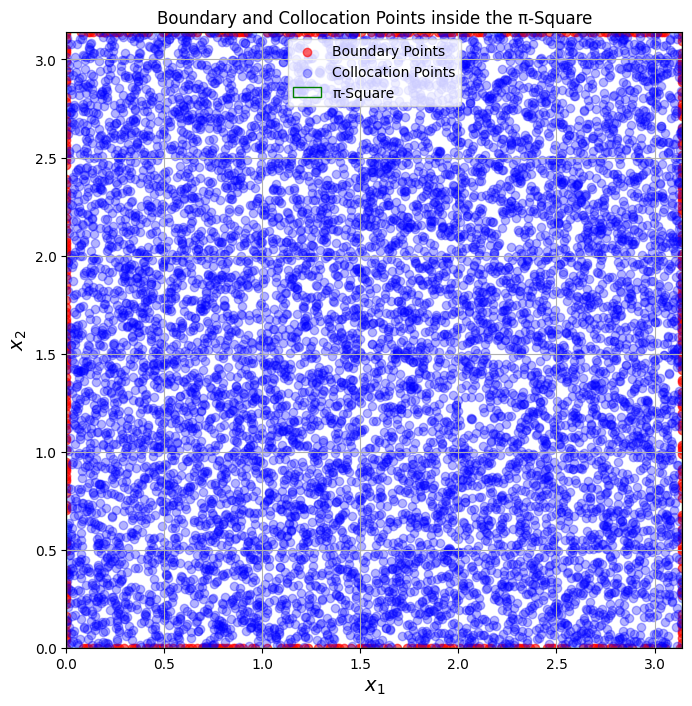

In [ ]:
# Specify number of grid points and number of dimensions
num_grid_pts = 256
nDim = 2

# Prepare test data
grids, axis_points = create_grid(num_grid_pts=num_grid_pts, n_dim=nDim)
X, Y = grids[0], grids[1]
x_1, x_2 = axis_points[0], axis_points[1]
X_u_test, lb, ub = prepare_test_data(X, Y)

# Analytical solution of the PDE
n = 1
m = 1
k = np.sqrt(np.pi ** 2 * (m ** 2 + n ** 2))
usol = np.sin(n * X) * np.sin(m * Y)

# Flatten the solution
u_true = usol.flatten()[:, None]

# Number of training points and collocation points
N_u = 500  # Total number of data points for 'u', used to train the model on boundary conditions
N_f = 10000  # Total number of collocation points for training the physics-informed part of the model in the domain

# Prepare training data
collocation_points_np_array, boundary_points_np_array, boundary_values_np_array = prepare_training_data(N_u, N_f, lb, ub, usol, X, Y)

# Visualize the training data
visualize_training_data(collocation_points_np_array, boundary_points_np_array, boundary_values_np_array)

To test the model, we <font color='blue'>compare</font> the <font color='blue'>network's prediction</font> with an <font color='blue'>analytical solution</font> of the Helmholtz equation:

$$u(x_1,x_2)=\sin(nx_1)\sin(mx_2)$$

where $n = 1$ and $m = 1$. The wavenumber $k$ is calculated as:
$$k=\sqrt{\pi^2\left(m^2+n^2\right)}.$$

HelmholtzPINN(
  (activation): LeakyReLU(negative_slope=0.01)
  (loss_function): MSELoss()
  (l1loss_function): L1Loss()
  (linears): ModuleList(
    (0): Linear(in_features=2, out_features=200, bias=True)
    (1-3): 3 x Linear(in_features=200, out_features=200, bias=True)
    (4): Linear(in_features=200, out_features=1, bias=True)
  )
)


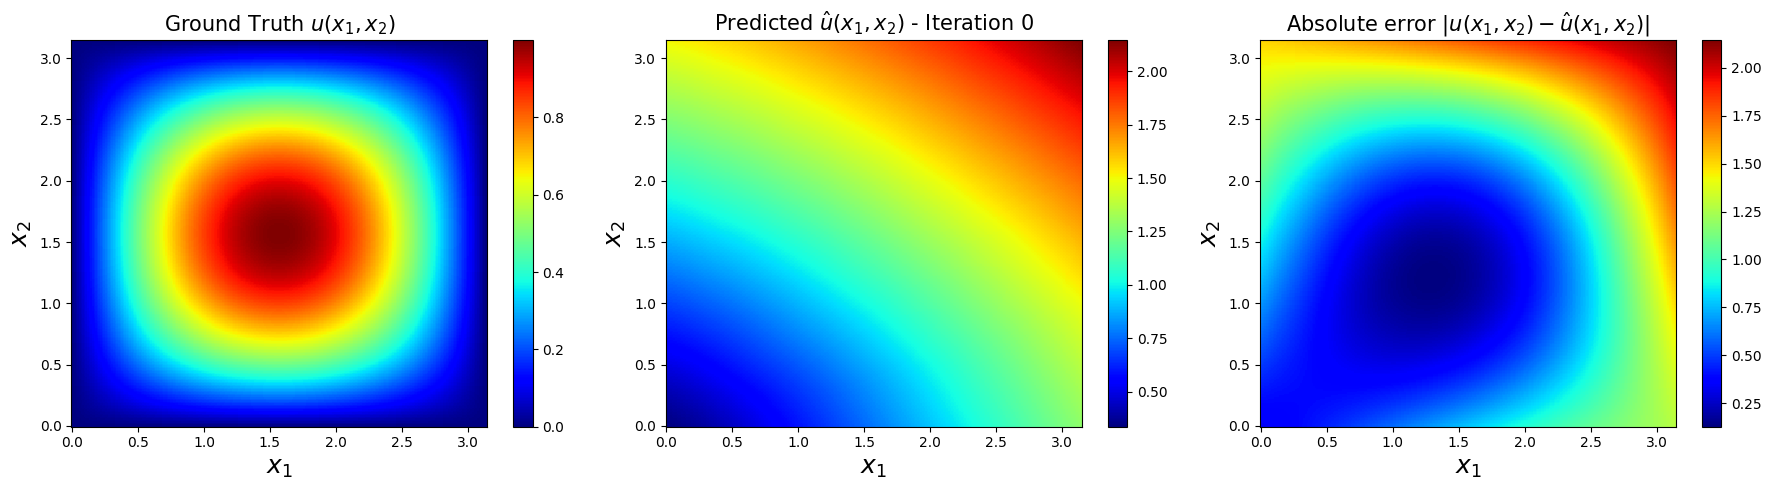

<Figure size 640x480 with 0 Axes>

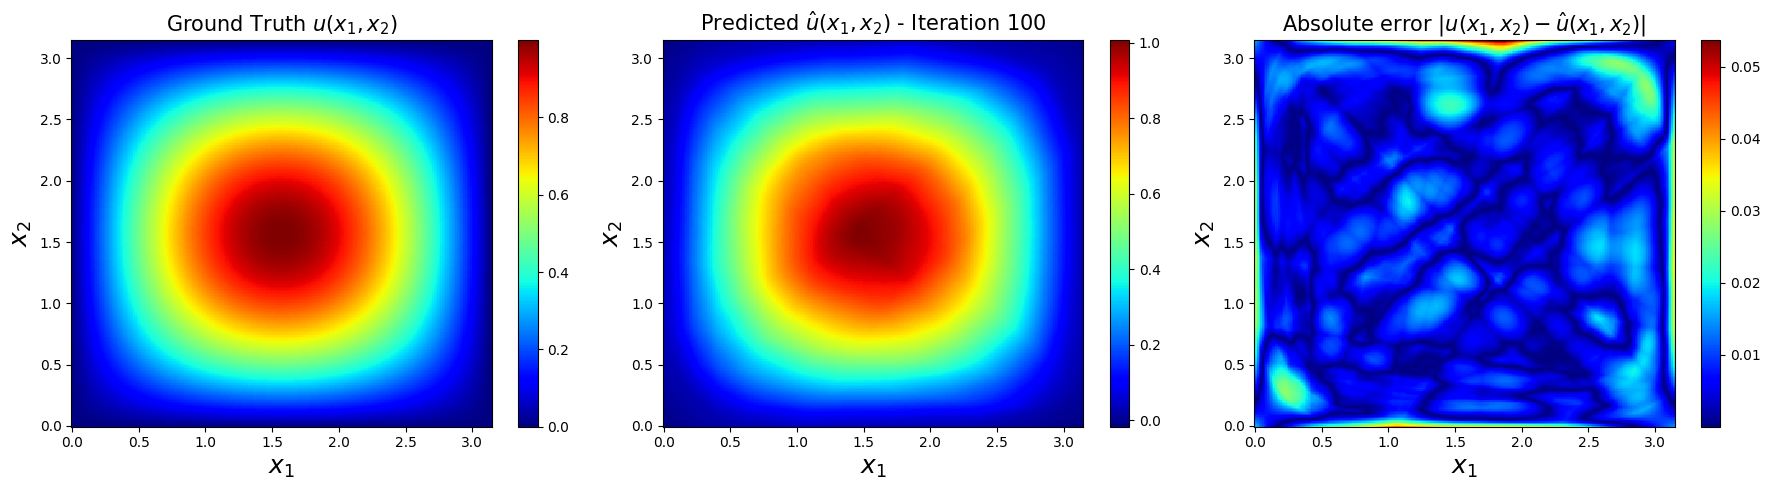

<Figure size 640x480 with 0 Axes>

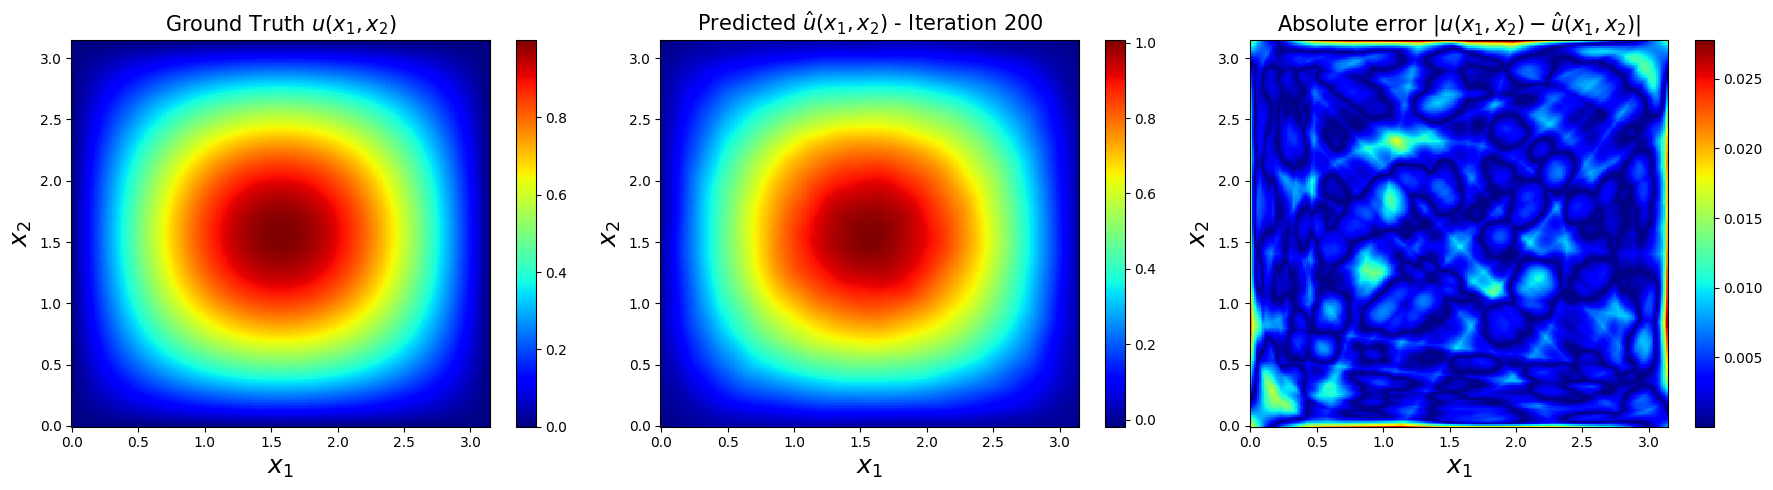

<Figure size 640x480 with 0 Axes>

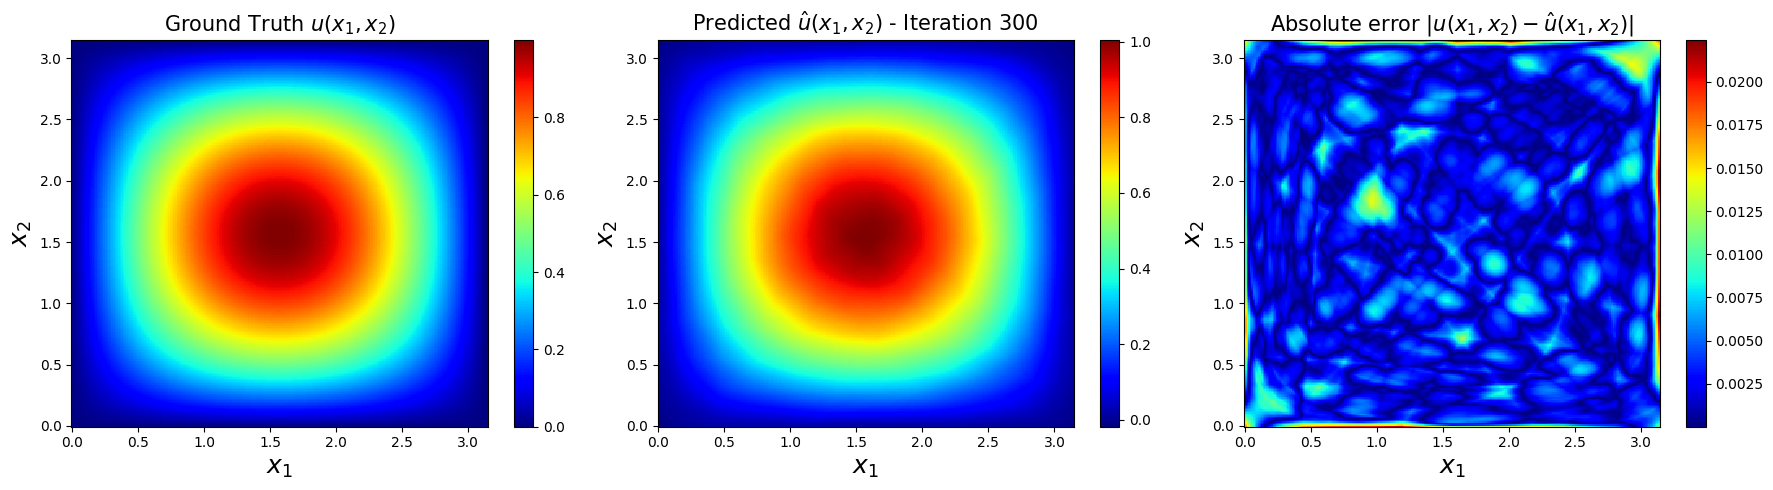

<Figure size 640x480 with 0 Axes>

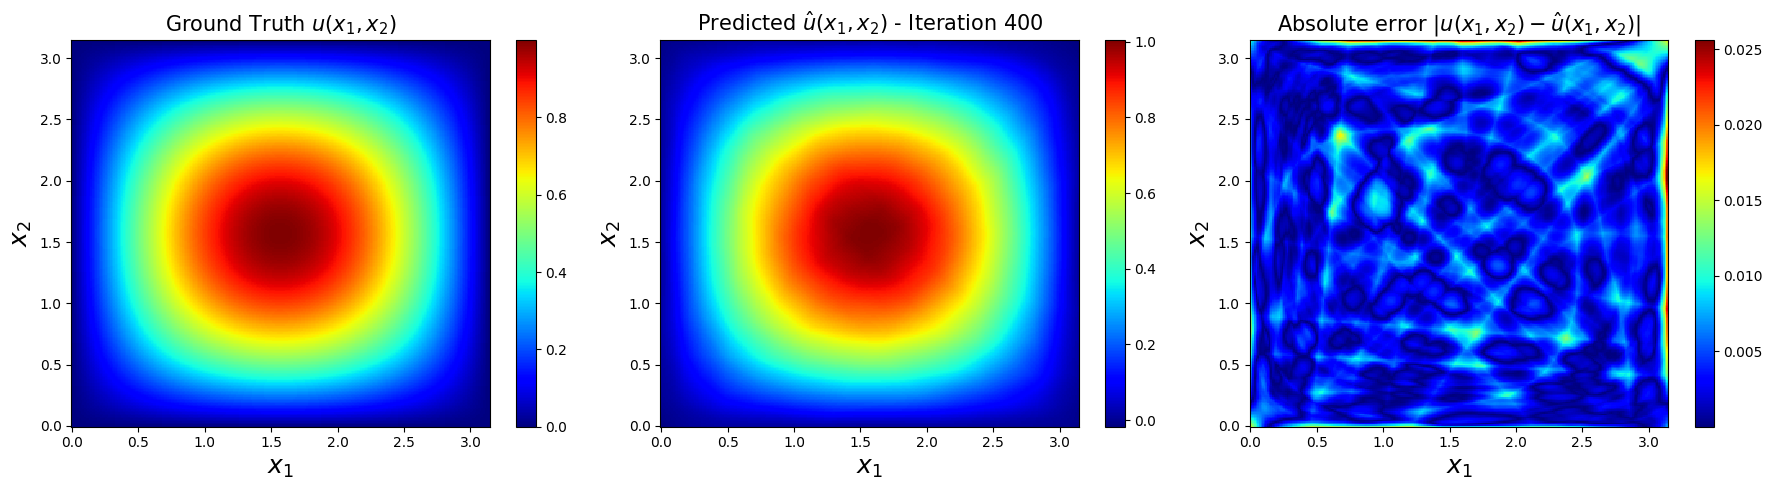

<Figure size 640x480 with 0 Axes>

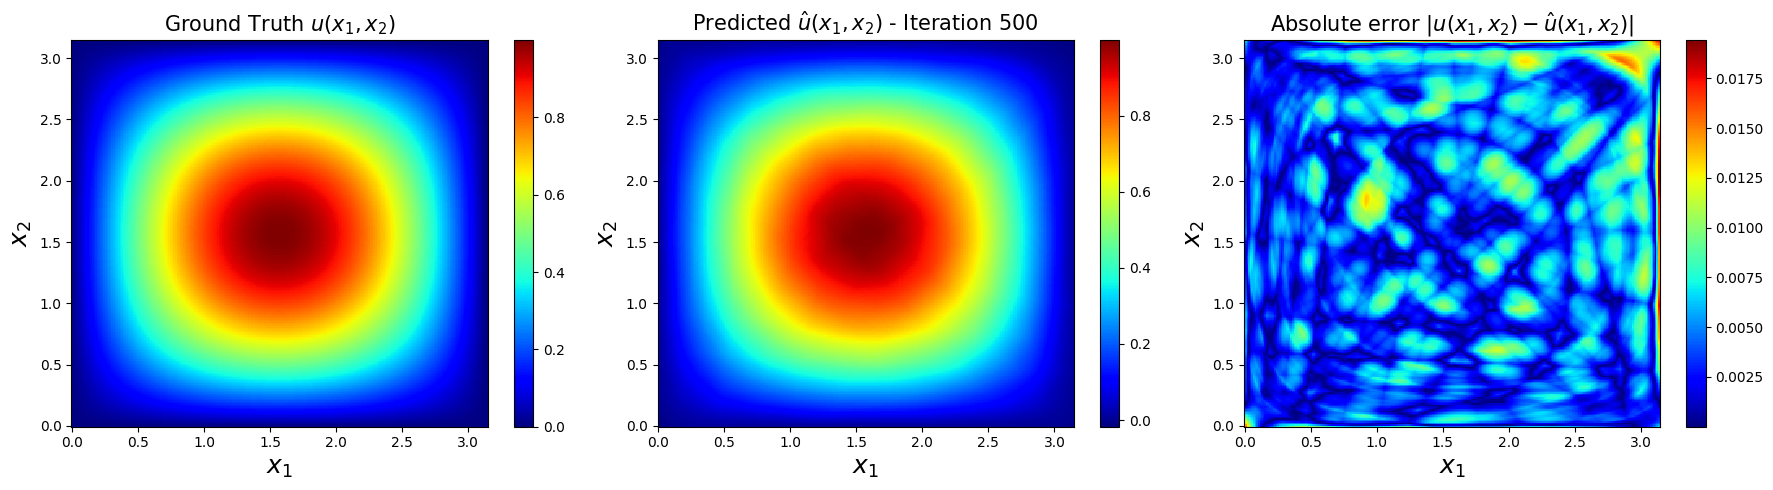

<Figure size 640x480 with 0 Axes>

In [ ]:
# Convert numpy arrays to PyTorch tensors and move to GPU (if available)
collocation_points = torch.from_numpy(collocation_points_np_array).float().to(device)  # Collocation points
boundary_points = torch.from_numpy(boundary_points_np_array).float().to(device)  # Boundary condition points
boundary_values = torch.from_numpy(boundary_values_np_array).float().to(device)  # Boundary condition values
X_u_test_tensor = torch.from_numpy(X_u_test).float().to(device)  # Test data for boundary conditions
u = torch.from_numpy(u_true).float().to(device)  # True solution values (ground truth for testing)
f_hat = torch.zeros(collocation_points.shape[0], 1).to(device)  # Zero tensor for the physics equation residual

# Neural network architecture
layers = np.array([2, 200, 200, 200, 200, 1])
PINN = HelmholtzPINN(layers)

# Move the model to the GPU (if available)
PINN.to(device)

# Print the neural network architecture
print(PINN)

# Store the neural network parameters for optimization
params = list(PINN.parameters())

# Optimizer setup
adam_optimizer = optim.Adam(PINN.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-6, amsgrad=False)
lbfgs_optimizer = optim.LBFGS(PINN.parameters(), max_iter=500, tolerance_grad=1e-5, tolerance_change=1e-9, history_size=100)

start_time = time.time()  # Start timer

# Adam optimization loop
adam_iter = 600

# Store training progress
train_losses = []
test_losses = []
train_maes = []
test_maes = []
steps = []

for i in range(adam_iter):
    # Forward pass for boundary condition points (train data)
    u_pred_train = PINN.forward(boundary_points)

    # Data loss (MSE between predicted and true boundary condition values)
    data_loss = PINN.loss_function(u_pred_train, boundary_values)  # Boundary condition loss

    # Physics loss (PDE residuals computed inside the domain)
    physics_loss = PINN.loss_PDE(collocation_points, k)  # Physics loss at collocation points

    # Total loss: sum of data loss (boundary) and physics loss (domain)
    train_loss = data_loss + physics_loss

    # Train MAE (L1 loss between predicted and true solution on boundary points)
    train_mae = PINN.l1loss_function(u_pred_train, boundary_values)

    # Zero gradient buffers
    adam_optimizer.zero_grad()

    # Backpropagate gradients
    train_loss.backward()

    # Update model parameters
    adam_optimizer.step()

    if i % 10 == 0:
        # Test the model on validation data
        u_pred_test = PINN.forward(X_u_test_tensor)

        # Test loss (MSE between predicted and true solution on test data)
        test_loss = PINN.loss_function(u_pred_test, u)

        # Compute test MAE (L1 loss between predictions and true solution on test data)
        test_mae = PINN.l1loss_function(u_pred_test, u)

        # Print current iteration details
        #print(f"Iteration {i}: Train Loss {train_loss.item()}, Test Loss {test_loss.item()}, "
        #      f"Train MAE {train_mae.item()}, Test MAE {test_mae.item()}")

        # Append the current values to track progress
        steps.append(i)
        train_losses.append(train_loss.item())
        test_losses.append(test_loss.item())
        train_maes.append(train_mae.item())
        test_maes.append(test_mae.item())

    if i % 100 == 0:

        # Predict the solution
        _, u_pred, _ = PINN.test(X_u_test_tensor, u)

        # Visualize the current prediction
        solutionplot(u_pred, usol, x_1, x_2, i)

The PINN does fairly well in this setting.

In [ ]:
# L-BFGS optimization
lbfgs_optimizer.step(LBFGS_training)

# Test after L-BFGS optimization
error_vec, u_pred, _ = PINN.test(X_u_test_tensor, u)
print(f'L-BFGS Test Error: {error_vec.item()}')

# Total training time
elapsed = time.time() - start_time
print(f'Training time: {elapsed:.2f} seconds')

L-BFGS Test Error: 0.0026507279835641384
Training time: 172.46 seconds


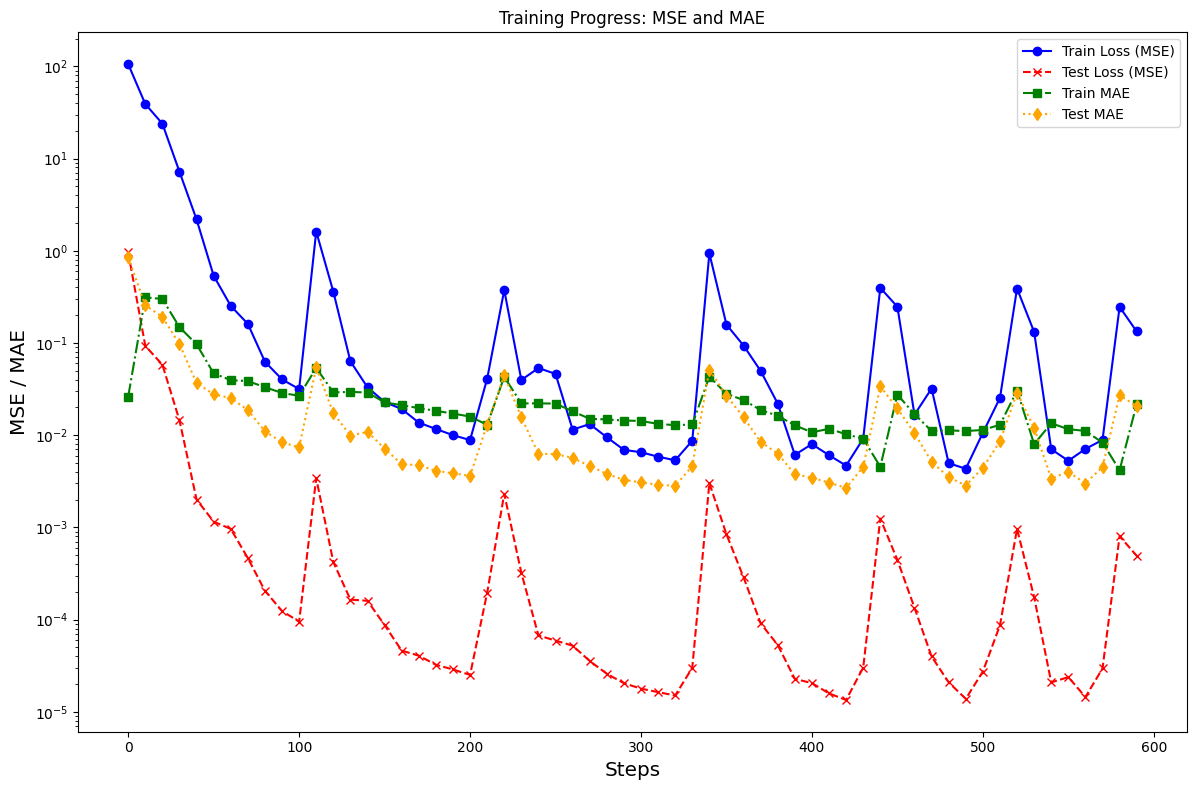

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot training progress
plot_training_progress(train_losses, test_losses, train_maes, test_maes, steps)

# Third Example: Two-Dimensional Gross-Pitaevskii Elliptic BVP

Let's now examine the time-independent Gross-Pitaevskii Eigenvalue Problem
$$
\begin{cases}
-\Delta u +Vu+\eta |u|^2u=\lambda u, &\text{ in }U\\
u(x)=0, &\text{ on }\partial U
\end{cases}
$$

where $x=(x_1,x_2)\in\mathbb R^2$, $U\subset\mathbb R^2$ is bounded, $V(x)$ is a potential, and $\lambda$ is an eigenvalue.

We are interested in finding the <font color='blue'>ground eigenpair $(u,\lambda)$</font> with the <font color='blue'>smallest eigenvalue</font>. In order to find the smallest eigenvalue, we use the <font color='blue'>energy method</font>
\begin{align*}
\mathcal{E}=
\inf_{u\in H}
\left\{
\frac{1}{2}\int_\Omega |\nabla u|^2 +V|u|^2+\frac{\eta}{2}|u|^4
\right\},
\end{align*}
where
\begin{align*}
H=\left\{
u\in H_0^1:
\|u\|_{L^2}=1
\right\}.
\end{align*}

For convenience, we define
\begin{align*}
\mathcal{E}(u):= \left\{
\frac{1}{2}\int_\Omega |\nabla u|^2 +V|u|^2+\frac{\eta}{2}|u|^4
\right\},
\end{align*}

then the ground state is defined by
\begin{align*}
u=\text{argmin}_{u\in H} \mathcal{E}(u).\\
\end{align*}

Given the PDE problem $\mathcal{P}(u)=0$, the <font color='blue'>PINN method</font> is to <font color='blue'>find the minimizer</font> of
\begin{align*}
\mathcal{R}=\frac{1}{N}\sum_{k=1}^{N}
|\mathcal{P}(u(x_k))|^2
\end{align*}
with the <font color='blue'>given data points</font> $x=[x_1,x_2,\dots, x_N]$.

Because our eigenvalue problem has <font color='blue'>two solutions</font>, the <font color='blue'>ground state $u$</font> and the <font color='blue'>smallest eigenvalue $\lambda$</font>, the problem will be $\mathcal{P}(u,\lambda)=0$. With this, if PINN method is used, the goal is to <font color='blue'>minimize</font>
\begin{align*}
\mathcal{R}=\frac{1}{N}\sum_{k=1}^{N}
|\mathcal{P}(u(x_k)),\lambda|^2
\end{align*}

However, this minimization can give us <font color='blue'>multiple ground states</font> with <font color='blue'>multiple eigenvalues</font> as there is no restriction that $\lambda$ should be the smallest one. As we want to solve ground eigenpair problem, the PINN method might not return the ground state with the smallest eigenvalue.

We will introduce the <font color='blue'>Riesz loss</font> as a third objective for our neural network to satsify in <font color='blue'>combination</font> with the <font color='blue'>data loss</font> and <font color='blue'>physics loss</font>. We want the neural network to <font color='blue'>minimize both</font> of </font> these losses</font> and </font>find the ground pair</font> with the <font color='blue'>lowest eigenvalue</font> through the Riesz loss. One can show that these three losses are

\begin{align}
\mathcal{L}_{BC}(u) &= \frac{1}{N}\sum_{i=1, ~j=1}^{N} | u(x_i,x_j) |^2, \\
\mathcal{L}_{PDE}(u)&=\frac{1}{N}\sum_{i=1, ~j=1}^{N}|\Delta u(x_i,x_j)+V(x_i,y_j) u (x_i,y_j)+\eta u(x_i,x_j)^3 - \lambda u(x_i,x_j)|^2, \\
\mathcal{L}_{\mathcal{E}}(u)&=\frac{1}{N}\sum_{i=1, ~j=1}^{N} |\nabla u (x_i,y_j)|^2  +  V(x_i,y_j)|u(x_i,x_j)|^2 + \frac{\eta}{2} |u(x_i,x_j)|^4, \\
\end{align}

Additionally, we will consider a normalization and symmetry loss

\begin{align}
\mathcal{L}_{L^2}(u)&= \left(1- \frac{|\Omega|}{N}\sum_{i=1, ~j=1}^{N} |u(x_i,x_j)|^2   \right)^2 \approx  (1-\|u\|_{L^2}^2)^2, \\
\mathcal{L}_{Sym}(u) &= \frac{1}{N}\sum_{i=1, ~j=1}^{N} |u(x_i,x_j)-u\left((a+b)-x_i,x_j\right)|^2,
\end{align}

where $x=\frac{a+b}{2}$ is symmetric across the vertical axis. The network approximates the solution $u(x)$ by minimizing five losses:

- The <font color='blue'>data loss</font>, which penalizes <font color='blue'>deviation from boundary conditions</font>.
- The <font color='blue'>PDE loss</font>, which ensures that the solution <font color='blue'>satisfies the Gross-Pitaevskii Elliptic PDE</font>.
- The <font color='blue'>Riesz energy loss</font>, which penalizes <font color='blue'>deviation from the lowest energy ground state</font>.
- The <font color='blue'>$L^2$ normalization loss</font>, which ensures <font color='blue'>normalization of the ground state solution u</font>.
- The <font color='blue'>symmetry loss</font>, which ensures that a <font color='blue'>symmetric potential will produce a symmetric solution $u$</font>.

Schematically, the PINN schema will follow the diagram below and will include three hidden layers and five loss terms.

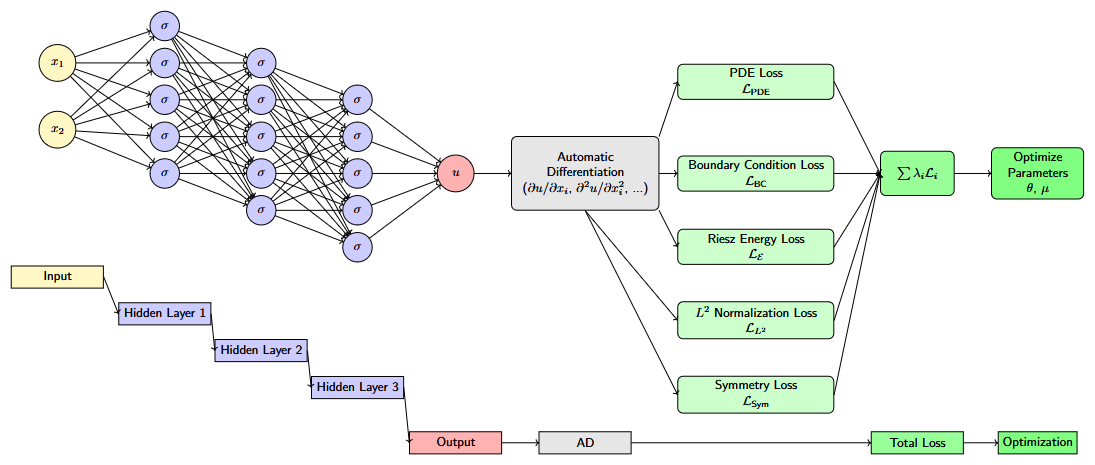

In [ ]:
Image('PINN_schema.png')

Let's setup our environment and get to work by creating a specialized PINN.

In [ ]:
%%capture
!pip install pyDOE

In [ ]:
import numpy as np
import torch
import torch.autograd as autograd         # Computation graph
from torch.autograd import grad           # Gradient computation
from torch import Tensor                  # Tensor node in the computation graph
import torch.nn as nn                     # Neural networks
import torch.optim as optim               # Optimizers for gradient descent
import time
from pyDOE import lhs                     # Latin Hypercube Sampling
import matplotlib.pyplot as plt
from torch.utils.checkpoint import checkpoint

# Set default dtype to float32
torch.set_default_dtype(torch.float)

# PyTorch random number generator
torch.manual_seed(1234)

# NumPy random number generator
np.random.seed(1234)

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"Using device: {device}")

Using device: cuda


We once again create functions to prepare training and testing data alongside a function to visualize our training data.

In [ ]:
def create_grid(num_grid_pts=256, n_dim=2):
    """
    Create an n-dimensional grid of points as a NumPy array.

    Parameters
    ----------
    num_grid_pts : int, optional
        The number of grid points along each dimension (default is 256).
    n_dim : int, optional
        The number of dimensions (default is 2).

    Returns
    -------
    grid : np.ndarray
        n-dimensional grid points as a NumPy array.
    axis_points : list of np.ndarray
        List of 1D arrays of points for every dimension.
    """
    # Form 1D arrays for every dimension
    axis_points = [np.linspace(0, np.pi, num_grid_pts) for _ in range(n_dim)]

    # Generate a meshgrid up to n_dim
    grids = np.meshgrid(*axis_points, indexing='ij', sparse=False)

    return grids, axis_points


def prepare_training_data(N_u, N_f, lb, ub, num_grid_pts, X, Y):
    """
    Prepare boundary condition data and collocation points for training.

    Parameters
    ----------
    N_u : int
        Number of boundary condition points to select.
    N_f : int
        Number of collocation points for the physics-informed model.
    lb : np.Tensor
        Lower bound of the domain.
    ub : np.Tensor
        Upper bound of the domain.
    num_grid_pts : int
        Number of grid points.
    X : np.Tensor
        X grid of points.
    Y : np.Tensor
        Y grid of points.

    Returns
    -------
    collocation_points : np.Tensor
        Combined collocation points and boundary points as training data.
    boundary_points : np.Tensor
        Selected boundary condition points.
    boundary_values : np.Tensor
        Corresponding boundary condition values.
    """

    # Extract boundary points and values from all four edges
    leftedge_x = np.hstack((X[:, 0][:, None], Y[:, 0][:, None]))
    leftedge_u = np.zeros((num_grid_pts, 1))

    rightedge_x = np.hstack((X[:, -1][:, None], Y[:, -1][:, None]))
    rightedge_u = np.zeros((num_grid_pts, 1))

    topedge_x = np.hstack((X[0, :][:, None], Y[0, :][:, None]))
    topedge_u = np.zeros((num_grid_pts, 1))

    bottomedge_x = np.hstack((X[-1, :][:, None], Y[-1, :][:, None]))
    bottomedge_u = np.zeros((num_grid_pts, 1))

    # Combine all edge points
    all_X_u_train = np.vstack([leftedge_x, rightedge_x, bottomedge_x, topedge_x])
    all_u_train = np.vstack([leftedge_u, rightedge_u, bottomedge_u, topedge_u])

    # Randomly select N_u points from boundary
    idx = np.random.choice(all_X_u_train.shape[0], N_u, replace=False)

    # Select the corresponding training points and u values
    boundary_points = all_X_u_train[idx[0:N_u], :]  # Boundary points (x, t)
    boundary_values = all_u_train[idx[0:N_u], :]      # Corresponding u values

    # Generate N_f collocation points using Latin Hypercube Sampling
    X_f = lb + (ub - lb) * lhs(2, N_f)  # Generates points in the domain [lb, ub]

    # Combine collocation points with boundary points
    collocation_points = np.vstack((X_f, boundary_points))

    return collocation_points, boundary_points, boundary_values


def prepare_training_data_circle(N_u, N_f, center=(np.pi / 2, np.pi / 2), radius=np.pi / 2):
    """
    Generate training data including boundary points and interior collocation points.

    Parameters
    ----------
    N_u : int
        Number of boundary points.
    N_f : int
        Number of collocation points (interior points).
    center : tuple of float, optional
        Center of the circular region (default is (pi/2, pi/2)).
    radius : float, optional
        Radius of the circular region (default is pi/2).

    Returns
    -------
    tuple of np.ndarray
        Tuple containing:
            - X_f_train: Interior points (collocation points).
            - X_u_train: Boundary points.
            - u_train: Boundary conditions (Dirichlet).
    """
    # Generate boundary points along the domain of the potential
    theta = np.linspace(0, 2 * np.pi, N_u)
    circle_x = center[0] + radius * np.cos(theta)
    circle_y = center[1] + radius * np.sin(theta)
    X_u_train = np.column_stack((circle_x, circle_y))
    u_train = np.zeros((X_u_train.shape[0], 1))  # Boundary condition u=0

    # Generate collocation points within the domain of the potential
    collocation_points_x = np.random.uniform(center[0] - radius, center[0] + radius, N_f)
    collocation_points_y = np.random.uniform(center[1] - radius, center[1] + radius, N_f)
    interior_mask = (collocation_points_x - center[0]) ** 2 + (collocation_points_y - center[1]) ** 2 <= radius ** 2
    X_f_train = np.column_stack((collocation_points_x[interior_mask], collocation_points_y[interior_mask]))

    return X_f_train, X_u_train, u_train


def visualize_training_data(collocation_points, boundary_points, boundary_values, lb, ub):
    """
    Visualizes the boundary points, collocation points, and the domain.

    Parameters
    ----------
    collocation_points : np.ndarray
        Collocation points to visualize.
    boundary_points : np.ndarray
        Boundary points to visualize.
    boundary_values : np.ndarray
        Corresponding boundary condition values.
    lb : np.ndarray
        Lower bound of the domain.
    ub : np.ndarray
        Upper bound of the domain.
    """
    plt.figure(figsize=(8, 8))

    # Plot boundary points
    plt.scatter(boundary_points[:, 0], boundary_points[:, 1], color='red', label='Boundary Points', alpha=0.6)

    # Plot collocation points
    plt.scatter(collocation_points[:, 0], collocation_points[:, 1], color='blue', label='Collocation Points', alpha=0.3)

    # Plot the domain as a rectangle
    rect = plt.Rectangle(lb, ub[0]-lb[0], ub[1]-lb[1], color='green', fill=False, label='Domain')
    plt.gca().add_artist(rect)

    plt.xlim([lb[0] - 0.2, ub[0] + 0.2])
    plt.ylim([lb[1] - 0.2, ub[1] + 0.2])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel('$x$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.title('Boundary and Collocation Points')
    plt.legend()
    plt.grid()
    plt.show()

Then we create a more involved <font color='blue'>PINN class</font> in order to find the the <font color='blue'>ground eigenpair $(u,\lambda)$</font> with the <font color='blue'>smallest eigenvalue</font>.

In [ ]:
class GrossPitaevskiiPINN(nn.Module):
    """
    Physics-Informed Neural Network (PINN) for solving the 2D Gross-Pitaevskii Equation.

    Parameters
    ----------
    layers : list of int
        Neural network architecture, each entry defines the number of neurons in that layer.
    hbar : float, optional
        Reduced Planck's constant (default is 1.0).
    m : float, optional
        Mass of the particle (default is 1.0).
    g : float, optional
        Interaction strength (default is 100.0).
    """

    def __init__(self, layers, hbar=1.0, m=1.0, g=100.0):
        super(GrossPitaevskiiPINN, self).__init__()
        self.layers = layers
        self.network = self.build_network()
        self.hbar = hbar  # Planck's constant, fixed
        self.m = m  # Particle mass, fixed
        self.g = g  # Interaction strength, fixed

    def build_network(self):
        """
        Build the neural network.

        Returns
        -------
        nn.Sequential
            A PyTorch sequential model representing the neural network architecture.
        """
        layers = []
        for i in range(len(self.layers) - 1):
            layers.append(nn.Linear(self.layers[i], self.layers[i + 1]))
            if i < len(self.layers) - 2:
                layers.append(nn.Tanh())
        return nn.Sequential(*layers)

    def forward(self, x):
        """
        Forward pass through the neural network.

        Parameters
        ----------
        x : torch.Tensor
            Input tensor containing spatial points.

        Returns
        -------
        torch.Tensor
            Output tensor representing the predicted solution.
        """
        return self.network(x)

    def compute_potential(self, inputs, V0=1.0, x0=np.pi / 2, y0=np.pi / 2, sigma=0.5):
        """
        Compute the Gaussian potential V(x, y).

        Parameters
        ----------
        inputs : torch.Tensor
            Input tensor of spatial coordinates (x, y).
        V0 : float, optional
            Amplitude of the potential (default is 1.0).
        x0 : float, optional
            x-coordinate of the Gaussian center (default is pi/2).
        y0 : float, optional
            y-coordinate of the Gaussian center (default is pi/2).
        sigma : float, optional
            Standard deviation of the Gaussian (default is 0.5).

        Returns
        -------
        torch.Tensor
            Tensor representing the potential at the input spatial points.
        """
        x = inputs[:, 0]
        y = inputs[:, 1]
        V = V0 * torch.exp(-((x - x0) ** 2 + (y - y0) ** 2) / (2 * sigma ** 2))
        return V

    def boundary_loss(self, x_bc, u_bc):
        """
        Compute the boundary loss (MSE) for the boundary conditions.

        Parameters
        ----------
        x_bc : torch.Tensor
            Input tensor of boundary spatial points.
        u_bc : torch.Tensor
            Tensor of boundary values (for Dirichlet conditions).

        Returns
        -------
        torch.Tensor
            Mean squared error (MSE) at the boundary points.
        """
        u_pred = self.forward(x_bc)
        y_bc = torch.zeros_like(u_pred)
        return torch.mean((u_pred - y_bc) ** 2)

    def riesz_loss(self, predictions, inputs):
        """
        Compute the Riesz energy loss for the Gross-Pitaevskii equation.

        Parameters
        ----------
        predictions : torch.Tensor
            Predicted solution from the network.
        inputs : torch.Tensor
            Input tensor of spatial coordinates.

        Returns
        -------
        torch.Tensor
            Riesz energy loss value.
        """
        u = predictions

        if not inputs.requires_grad:
            inputs = inputs.clone().detach().requires_grad_(True)
        gradients = torch.autograd.grad(outputs=predictions, inputs=inputs,
                                        grad_outputs=torch.ones_like(predictions),
                                        create_graph=True, retain_graph=True)[0]

        laplacian_term = torch.sum(gradients ** 2)  # Kinetic term
        V = self.compute_potential(inputs).unsqueeze(1)
        potential_term = torch.sum(V * u ** 2)  # Potential term
        interaction_term = 0.5 * self.g * torch.sum(u ** 4)  # Interaction term

        riesz_energy = 0.5 * (laplacian_term + potential_term + interaction_term)

        return riesz_energy

    def pde_loss(self, inputs, predictions):
        """
        Compute the PDE loss for the Gross-Pitaevskii equation.

        Parameters
        ----------
        inputs : torch.Tensor
            Input tensor of spatial coordinates.
        predictions : torch.Tensor
            Predicted solution from the network.

        Returns
        -------
        tuple
            Tuple containing:
                - torch.Tensor: PDE loss value.
                - torch.Tensor: PDE residual.
                - torch.Tensor: Smallest eigenvalue (lambda).
        """
        u = predictions

        # Compute first and second derivatives with respect to x and y
        u_x = grad(u, inputs, grad_outputs=torch.ones_like(u), create_graph=True)[0][:, 0]
        u_y = grad(u, inputs, grad_outputs=torch.ones_like(u), create_graph=True)[0][:, 1]

        u_xx = grad(u_x, inputs, grad_outputs=torch.ones_like(u_x), create_graph=True)[0][:, 0]
        u_yy = grad(u_y, inputs, grad_outputs=torch.ones_like(u_y), create_graph=True)[0][:, 1]
        laplacian_u = u_xx + u_yy

        # Compute λ directly from the energy functional
        V = self.compute_potential(inputs)
        lambda_pde = torch.mean(u_x ** 2 + u_y ** 2 + V * u ** 2 + self.g * u ** 4) / torch.mean(u ** 2)

        # Residual of the PDE (Gross-Pitaevskii equation)
        pde_residual = -laplacian_u + V * u + self.g * torch.abs(u ** 2) * u - (lambda_pde * u)

        # Regularization: See https://arxiv.org/abs/2010.05075

        # Term 1: L_f = 1 / (f(x, λ))^2, penalizes the network if the PDE residual is close to zero to avoid trivial eigenfunctions
        L_f = 1 / (torch.mean(u ** 2) + 1e-2)

        # Term 2: L_λ = 1 / λ^2, penalizes small eigenvalues λ, ensuring non-trivial eigenvalues
        L_lambda = 1 / (lambda_pde ** 2 + 1e-6)

        # Term 3: L_drive = e^(-λ + c), encourages λ to grow, preventing collapse to small values
        c = 1.0  # Tunable constant
        L_drive = torch.exp(-lambda_pde + c)

        # PDE loss as the residual plus regularization terms
        pde_loss = torch.mean(pde_residual ** 2) + L_f + L_lambda

        return pde_loss, pde_residual, lambda_pde

    def symmetry_loss(self, collocation_points, a, b):
        """
        Compute the symmetry loss to enforce u(x, y) = u((a+b)-x, y).

        Parameters
        ----------
        collocation_points : torch.Tensor
            Tensor of interior spatial points with shape (N, 2).
        a, b : float
            The bounds defining the vertical symmetry axis at x = (a + b) / 2.

        Returns
        -------
        sym_loss : torch.Tensor
            The mean squared error enforcing symmetry u(x, y) = u((a+b)-x, y).
        """
        # Reflect points across the vertical axis x = (a + b) / 2
        reflected_points = collocation_points.clone()
        reflected_points[:, 0] = (a + b) - reflected_points[:, 0]  # Transform x-coordinate

        # Predict u(x, y) and u((a+b)-x, y) using the model
        u_original = self.forward(collocation_points)
        u_reflected = self.forward(reflected_points)

        # Compute mean squared difference to enforce symmetry
        sym_loss = torch.mean((u_original - u_reflected) ** 2)

        return sym_loss

    def total_loss(self, x, x_bc, u_bc):
        """
        Compute the total loss combining boundary, Riesz energy, and PDE losses.

        Parameters
        ----------
        x : torch.Tensor
            Input tensor of spatial coordinates for the interior points.
        x_bc : torch.Tensor
            Input tensor of boundary spatial points.
        u_bc : torch.Tensor
            Tensor of boundary values (for Dirichlet conditions).

        Returns
        -------
        torch.Tensor
            Total loss value.
        """
        data_loss = self.boundary_loss(x_bc, u_bc)
        pde_loss, _, _ = self.pde_loss(x, self.forward(x))
        riesz_energy_loss = self.riesz_loss(self.forward(x), x)
        norm_loss = (torch.norm(self.forward(collocation_points), p=2) - 1) ** 2
        sym_loss = self.symmetry_loss(x, 0, np.pi)

        weights = [50.0, 1.0, 2.0, 10.0, 50.0]
        domain_area = np.pi ** 2
        losses = [data_loss, riesz_energy_loss  / domain_area, pde_loss / domain_area, norm_loss, sym_loss]
        weighted_losses = [weights[i] * loss for i, loss in enumerate(losses)]
        total_loss = sum(weighted_losses)

        return total_loss

We then add our training functions and plotting functions.

In [ ]:
def initialize_weights(m):
    """
    Initialize the weights of the neural network layers using Xavier uniform initialization.

    Parameters
    ----------
    m : torch.nn.Module
        A layer of the neural network. If it is a linear layer, its weights and biases are initialized.
    """
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)


def train_pinn(N_u=500, N_f=10000, layers=[2, 400, 400, 400, 1], epochs=1000):
    """
    Train the Physics-Informed Neural Network (PINN) for the Gross-Pitaevskii equation.

    Parameters
    ----------
    N_u : int, optional
        Number of boundary points (default is 500).
    N_f : int, optional
        Number of collocation points (interior points) for the physics-based loss (default is 10,000).
    layers : list of int, optional
        Architecture of the neural network (default is [2, 400, 400, 400, 1]).
    epochs : int, optional
        Number of training epochs (default is 1000).

     Returns
    -------
    tuple
        A tuple containing:
            - model: Trained PINN model.
            - X_f_train_tensor: Collocation points (interior points).
            - X_u_train_tensor: Boundary points.
            - u_train_tensor: Boundary conditions (Dirichlet).
    """
    model = GrossPitaevskiiPINN(layers).to(device)  # Move model to device
    model.apply(initialize_weights)  # Apply weight initialization
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Prepare training data
    X_f_train, X_u_train, u_train = prepare_training_data_circle(N_u, N_f)

    # Convert data to PyTorch tensors and move to device
    X_f_train_tensor = torch.tensor(X_f_train, dtype=torch.float32, requires_grad=True).to(device)
    X_u_train_tensor = torch.tensor(X_u_train, dtype=torch.float32).to(device)
    u_train_tensor = torch.tensor(u_train, dtype=torch.float32).to(device)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        # Calculate the total loss
        loss = model.total_loss(X_f_train_tensor, X_u_train_tensor, u_train_tensor)

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        if epoch % 400 == 0:  # Plot every 400 epochs
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')
            pde_loss, _, lambda_pde = model.pde_loss(X_f_train_tensor, model.forward(X_f_train_tensor))
            plot_solution(model, num_grid_pts=100, center=(np.pi / 2, np.pi / 2), radius=np.pi / 2, epoch=epoch,
                          lambda_pde=lambda_pde.item())

    # Return model and training data
    return model, X_f_train_tensor, X_u_train_tensor, u_train_tensor


def plot_solution(model, num_grid_pts=100, center=(np.pi / 2, np.pi / 2), radius=np.pi / 2, epoch=0, lambda_pde=0):
    """
    Plot the predicted solution of the Gross-Pitaevskii equation.

    Parameters
    ----------
    model : GrossPitaevskiiPINN
        The trained PINN model.
    num_grid_pts : int, optional
        Number of grid points for plotting the solution (default is 100).
    center : tuple of float, optional
        Center of the circular region for plotting (default is (pi/2, pi/2)).
    radius : float, optional
        Radius of the circular region for plotting (default is pi/2).
    epoch : int, optional
        The current training epoch, used in the plot title (default is 0).
    lambda_pde : float, optional
        The smallest eigenvalue from the PDE loss, used in the plot title (default is 0).
    """
    x_vals = np.linspace(center[0] - radius, center[0] + radius, num_grid_pts)
    y_vals = np.linspace(center[1] - radius, center[1] + radius, num_grid_pts)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Prepare test data
    X_test = np.hstack((X.flatten()[:, None], Y.flatten()[:, None]))
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)

    # Predict the solution using the trained model
    u_pred = model(X_test_tensor).detach().cpu().numpy().reshape((num_grid_pts, num_grid_pts))

    plt.figure(figsize=(8, 6))
    plt.pcolor(X, Y, np.abs(u_pred) / np.max(np.abs(u_pred)), shading='auto', cmap='viridis')
    plt.colorbar(label='Predicted Solution $u_{pred}$')
    plt.title(
        f'Predicted Solution of the Gross-Pitaevskii Equation\nEpoch: {epoch}, Smallest Eigenvalue: {lambda_pde:.4f}')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.xlim([center[0] - radius, center[0] + radius])
    plt.ylim([center[1] - radius, center[1] + radius])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend(['Smallest Eigenvalue'])
    plt.show()


def plot_potential(X_test, potential):
    """
    Plot the potential.
    """
    plt.figure(figsize=(6, 5))
    X = X_test[:, 0].reshape((num_grid_pts, num_grid_pts))
    Y = X_test[:, 1].reshape((num_grid_pts, num_grid_pts))
    potential = potential.reshape((num_grid_pts, num_grid_pts))

    plt.contourf(X, Y, potential, levels=50, cmap='viridis')
    plt.colorbar()
    plt.title('Potential V(x, y)')
    plt.show()

We then train our PINN over $\partial U$. We start by <font color='blue'>visualizing</font> the <font color='blue'>Gaussian potential</font> and the <font color='blue'>training data</font>.

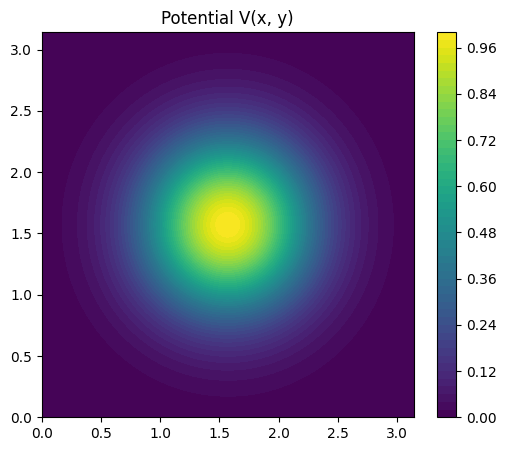

In [ ]:
# Specify number of grid points and number of dimensions
num_grid_pts = 256
nDim = 2

# Prepare data
grids, axis_points = create_grid(num_grid_pts=num_grid_pts, n_dim=nDim)
X, Y = grids[0], grids[1]
x_1, x_2 = axis_points[0], axis_points[1]

# Flatten the grids and stack them into a 2D array
X_u_test = np.hstack((X.flatten()[:, None], Y.flatten()[:, None]))

# Domain bounds
lb = np.array([0, 0])
ub = np.array([np.pi, np.pi])

N_u = 500  # Number of boundary points
N_f = 10000  # Number of collocation points
collocation_points_np_array, boundary_points_np_array, boundary_values_np_array = prepare_training_data(N_u, N_f, lb, ub, num_grid_pts, X, Y)

# Convert numpy arrays to PyTorch tensors and move to GPU (if available)
collocation_points = torch.from_numpy(collocation_points_np_array).float().to(device)  # Collocation points
boundary_points = torch.from_numpy(boundary_points_np_array).float().to(device)  # Boundary condition points
boundary_values = torch.from_numpy(boundary_values_np_array).float().to(device)  # Boundary condition values
X_u_test_tensor = torch.from_numpy(X_u_test).float().to(device)  # Test data for boundary conditions
f_hat = torch.zeros(collocation_points.shape[0], 1).to(device)  # Zero tensor for the GPE equation residual

# Model parameters
layers = [2, 100, 100, 100, 1]  # Neural network architecture
epochs = 2001  # Number of training epochs

# Calculate the potential
model = GrossPitaevskiiPINN(layers).to(device)  # Initialize the model
X_test_tensor = torch.from_numpy(X_u_test).float().to(device)  # Convert test data to tensor
potential = model.compute_potential(X_test_tensor).cpu().detach().numpy()  # Calculate potential and move to CPU

# Visualize the potential
plot_potential(X_u_test, potential)

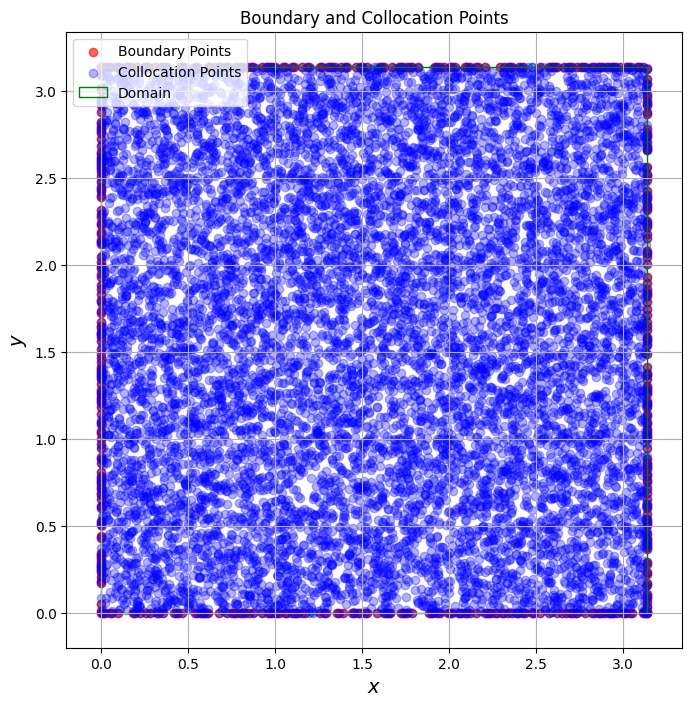

In [ ]:
# Visualize training data
visualize_training_data(collocation_points_np_array, boundary_points_np_array, boundary_values_np_array, lb, ub)

We then train our PINN.

GrossPitaevskiiPINN(
  (network): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): Tanh()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): Tanh()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): Tanh()
    (6): Linear(in_features=100, out_features=1, bias=True)
  )
)
Epoch [0/2001], Loss: 4781.897461


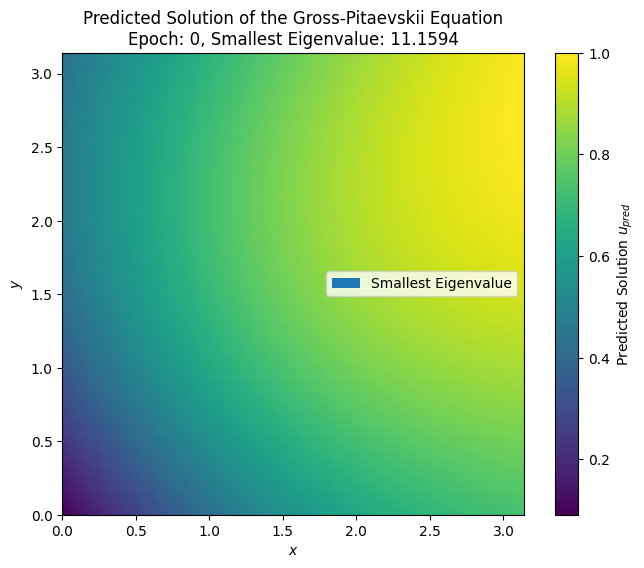

Epoch [400/2001], Loss: 20.183867


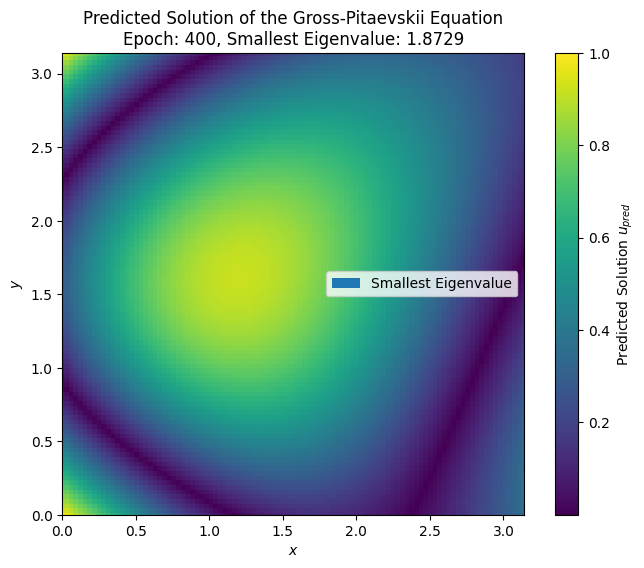

Epoch [800/2001], Loss: 20.179785


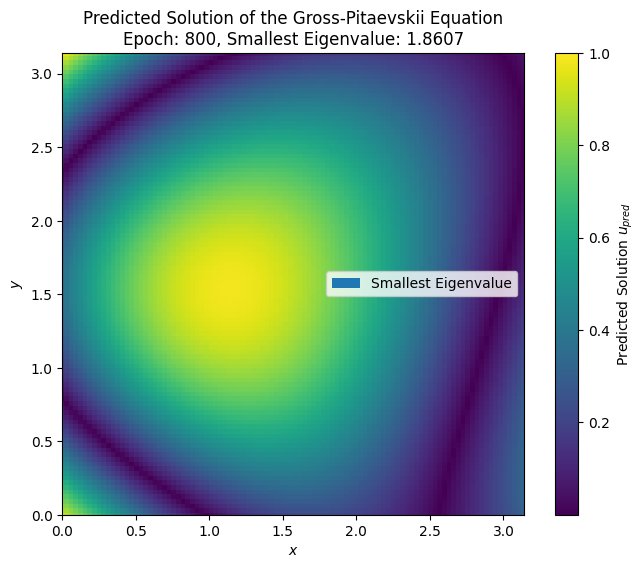

Epoch [1200/2001], Loss: 20.178728


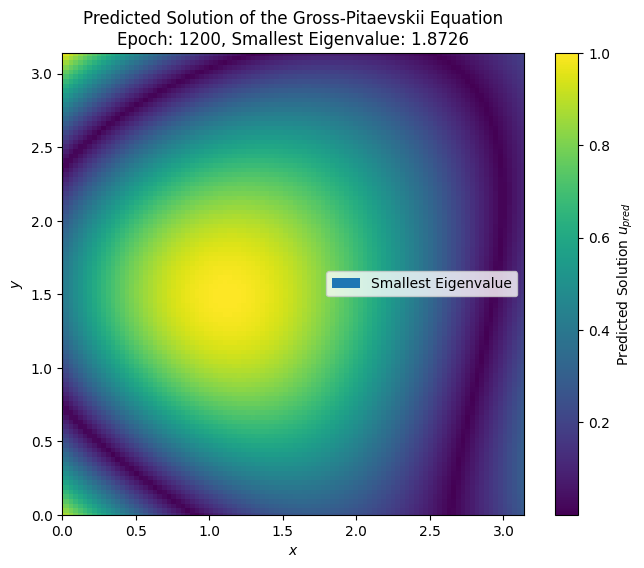

Epoch [1600/2001], Loss: 20.178413


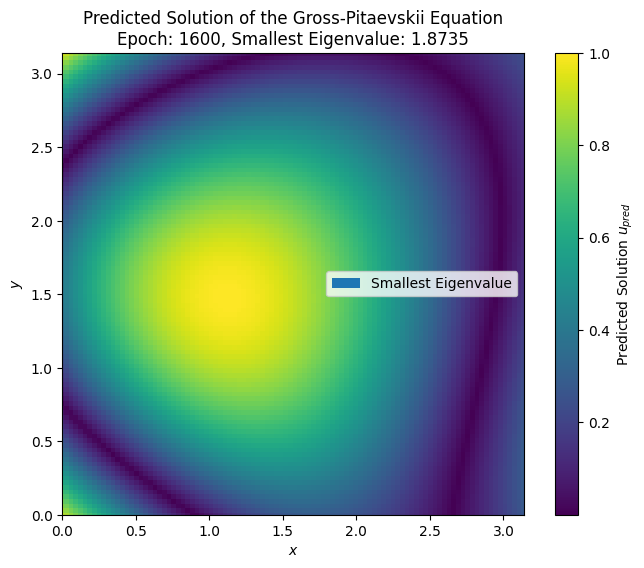

Epoch [2000/2001], Loss: 20.178141


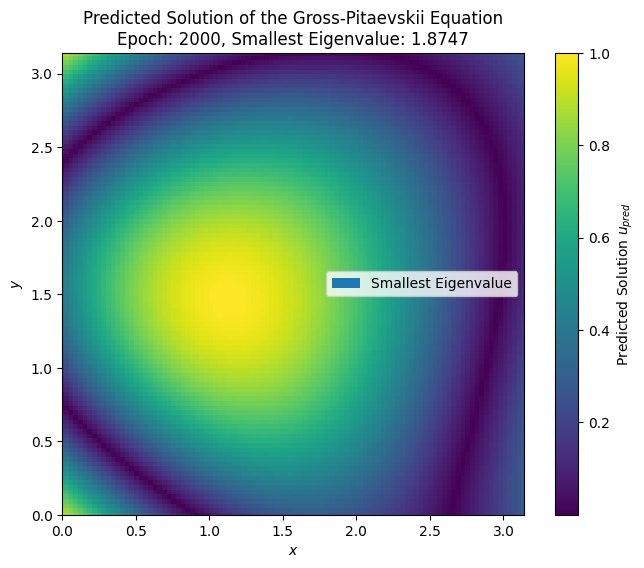

In [ ]:
# Print the neural network architecture
print(model)

# Train the PINN
model, X_f_train_tensor, X_u_train_tensor, u_train_tensor = train_pinn(N_u=N_u, N_f=N_f, layers=layers, epochs=epochs)

In [ ]:
# Final test loss
loss = model.total_loss(X_f_train_tensor, X_u_train_tensor, u_train_tensor)
print(f'Test Loss: {loss:.5f}')

Test Loss: 20.17814


## Remark

The choice of activation function is extremely important for PINNs. In [Which Optimizer Works Best for Physics-Informed Neural Networks and Kolmogorov-Arnold Networks?](https://arxiv.org/pdf/2501.16371) [32] the [Crunch Group](https://sites.brown.edu/crunch-group/) finds that Self-Scaled Broyden (SSBroyden) methods exhibit outstanding performance against traditional methods such as Adam and L-BFGS.

# Advantages and Disadvantages of PINNs

The paper [Characterizing Possible Failure Modes in Physics-Informed Neural Networks](https://arxiv.org/pdf/2109.01050) [33] explores the <font color='blue'>limitations of PINNs in solving PDEs</font>, particularly for complex physical systems involving convection, reaction, and diffusion. The authors analyzed how PINNs performed with several different optimization problems.

Advantages of PINNs:

- <font color='blue'>Incorporation of Physics Knowledge</font>: PINNs embed physical domain knowledge directly into the neural network training process by using PDE-based soft regularization. This allows them to potentially solve physics-related problems with limited data.
- <font color='blue'>Broad Applicability</font>: PINNs can theoretically be applied to a wide range of PDE problems across engineering and scientific fields.
- <font color='blue'>Combination of Data and Domain Models</font>: PINNs offer a framework to combine data-driven approaches with scientific modeling, making them suitable for real-world applications where data is sparse or incomplete.

Disadvantages of PINNs:

- <font color='blue'>Optimization Complexity</font>: Adding physical constraints as soft regularization introduces significant optimization challenges, making the loss landscape complex and hard to navigate, especially with non-trivial PDE coefficients.
- <font color='blue'>Sensitivity to PDE Coefficients</font>: PINNs fail to learn accurate solutions when convection, reaction, or diffusion coefficients are large, often resulting in nearly 100% error, even after extensive hyperparameter tuning.
- <font color='blue'>Ill-Conditioned Regularization</font>: The PDE-based regularization used in PINNs can be ill-conditioned, leading to instability in training and poor convergence behavior. This is particularly problematic when dealing with higher-order or more complex differential operators.

With these, they proposed two potential solutions:

1. <font color='blue'>Curriculum Regularization</font>:

  Advantage: This method progressively increases the difficulty of the PDE constraints during training, allowing the network to start with easier problems before tackling more complex ones. This leads to smoother optimization and lower error rates.

  Disadvantage: While this method reduces errors significantly, it adds complexity to the training process, as the PDE constraints need to be manually scaled.
2. <font color='blue'>Sequence-to-Sequence Learning</font>:

  Advantage: Instead of predicting the entire space-time domain at once, this approach breaks down the learning task into smaller time steps. This reduces the optimization burden and results in up to two orders of magnitude lower error in difficult PDE problems.
        
  Disadvantage: This approach may require additional computational resources, as the network must learn iteratively over smaller time segments rather than solving the entire problem at once.

# DeepONet and Fourier Neural Operators

Building on the idea of PINNs, the [Crunch group](https://sites.brown.edu/crunch-group/) at Brown University developed Fourier Neural Operators (<font color='blue'>FNOs</font>) to <font color='blue'>generalize neural networks</font> for <font color='blue'>learning solution operators</font> of partial differential equations (PDEs). Unlike <font color='blue'>traditional neural networks</font> that learn a <font color='blue'>mapping from inputs to outputs</font>, <font color='blue'>FNOs</font> aim to <font color='blue'>learn an operator</font>, which <font color='blue'>maps entire functions to functions</font>. This makes them particularly effective for <font color='blue'>solving high-dimensional PDEs</font> and modeling complex physical systems.

Traditionally, solving Ordinary Differential Equations (ODEs) and Partial Differential Equations (PDEs) relies on <font color='blue'>numerical methods</font> such as <font color='blue'>finite difference</font> or <font color='blue'>finite element</font> techniques. However, these approaches are <font color='blue'>computationally expensive</font> and require <font color='blue'>re-running the solver</font> for <font color='blue'>each new input function</font>, making them inefficient for complex or high-dimensional systems.

A <font color='blue'>recent breakthrough</font> came with the idea of a [Physics-Informed DeepONet](https://arxiv.org/abs/2103.10974) [34] which combines the <font color='blue'>speed of neural networks</font> alongside <font color='blue'>operator learning</font> as map from a function space to a function space.



![PINN_DeepONet](https://towardsdatascience.com/wp-content/uploads/2023/07/1sw_ASBnezUX7rDf2v5c4Xw.png)

More information can be found in [here](https://towardsdatascience.com/operator-learning-via-physics-informed-deeponet-lets-implement-it-from-scratch-6659f3179887/) [35].

### References

[1] Strikwerda, John C. *Finite Difference Schemes and Partial Differential Equations*. SIAM, 2004.

[2] K. W. Morton and D. F. Mayers. *Numerical solution of partial differential equations*. Cambridge University Press, 2nd edition, 2005.

[3] Randall J. LeVeque. *Finite difference methods for ordinary and partial
differential equations*. SIAM, 2007.

[4] J. W. Thomas. *Numerical partial differential equations: finite difference
methods*. Texts in Applied Mathematics, Volume 22, 1995.

[5] Claes Johnson. *Numerical solution of partial differential equations by
the finite element method*. Cambridge University Press, 1987.

[6] George Em Karniadakis and Spencer J. Sherwin. *Spectral/hp element
methods for CFD*. Oxford University Press, 1999.

[7] Dietrich Braess. *Finite elements*. Cambridge University Press, 2nd edition, 2001.

[8] Jan S. Hesthaven and Tim Warburton. *Nodal discontinuous Galerkin
methods*. Texts in Applied Mathematics, Volume 54, 2008.

[9] D. Gottlieb and S. A. Orszag. *Numerical analysis of spectral methods:
theory and applications*. SIAM, 1977.

[10] C. Canuto, M. Y. H, A. Quarteroni, and T. A. Zang. *Spectral methods
in fluid dynamics*. Springer-Verlag, 1988.

[11] Bengt Fornberg. *A practical guide to pseudospectral methods, volume 1
of Cambridge Monographs on Applied and Computational Mathematics*.
Cambridge University Press, 1996.

[12] John P. Boyd. *Chebyshev and Fourier spectral methods*. Dover Publi-
cations Inc., 2nd edition, 2001.

[13] M. O. Deville, P. F. Fischer, and E. H. Mund. *High-order methods
for incompressible fluid flow, volume 9 of Cambridge Monographs on
Applied and Computational Mathematics*. Cambridge University Press,
2002.

[14] Jan S. Hesthaven, Sigal Gottlieb, and David Gottlieb. *Spectral methods
for time-dependent problems, volume 21 of Cambridge Monographs on
Applied and Computational Mathematics*. Cambridge University Press, 2007.

[15] D. Colton and R. Kress. *Inverse acoustic and electromagnetic scattering
theory*. Springer-Verlag, 2nd edition, 1998.

[16] Rainer Kress. *Linear integral equations*. Springer-Verlag,
2nd edition, 1999.

[17] Li, Zongyi, et al. *Fourier neural operator for parametric partial differential equations*. arXiv preprint arXiv:2010.08895, 2020.

[18] Lu, Lu, Pengzhan Jin, and George Em Karniadakis. *Deeponet: Learning nonlinear operators for identifying differential equations based on the universal approximation theorem of operators*. arXiv preprint arXiv:1910.03193, 2019.

[19] C. Lin, Z. Li, L. Lu, S. Cai, M. Maxey, & G. Karniadakis. *Operator learning for predicting multiscale bubble growth dynamics*. The Journal of Chemical Physics, 154(10), 104118, 2021.

[20] M. Zhu, S. Feng, Y. Lin, & L. Lu. *Fourier-DeepONet: Fourier-enhanced deep operator networks for full waveform inversion with improved accuracy, generalizability, and robustness*. arXiv preprint arXiv:2305.17289, 2023.

[21] Rey, Luis A. Pérez, Vlado Menkovski, and Jacobus W. Portegies. *Diffusion variational autoencoders*. arXiv preprint arXiv:1901.08991, 2019.

[22] N. Takeishi and A. Kalousis. *Physics-integrated variational autoencoders for robust and interpretable generative modeling*. Advances in Neural Information Processing Systems 34, 2021.

[23] M. Horie and N. Mitsume. *Physics-embedded neural networks: Graph neural pde solvers with mixed boundary conditions*. Advances in Neural Information Processing Systems 35, 2022.

[24] Gladstone, Rini Jasmine, et al. *GNN-based physics solver for time-independent PDEs*. arXiv preprint arXiv:2303.15681, 2023.

[25] Pathak, Jaideep, et al. "Fourcastnet: A global data-driven high-resolution weather model using adaptive fourier neural operators." arXiv preprint arXiv:2202.11214 (2022).

[26] Ben Moseley. *Scientific Machine Learning*. URL: https://benmoseley.blog/blog/. Accessed October 2024.

[27] Raissi, Maziar, Paris Perdikaris, and George E. Karniadakis. *Physics-informed neural networks: A deep learning framework for solving forward and inverse problems involving nonlinear partial differential equations*. Journal of Computational physics 378, 2019.

[28] Pang, Guofei, Lu Lu, and George Em Karniadakis. *fPINNs: Fractional physics-informed neural networks*. SIAM Journal on Scientific Computing 41.4, 2019.

[29] Costabal, Francisco Sahli, Simone Pezzuto, and Paris Perdikaris. *Δ-PINNs: physics-informed neural networks on complex geometries*. Engineering Applications of Artificial Intelligence 127, 2024.

[30] Kiyani, Elham, et al. "Which Optimizer Works Best for Physics-Informed Neural Networks and Kolmogorov-Arnold Networks?." arXiv preprint arXiv:2501.16371 (2025).

[31] Krishnapriyan, Aditi, et al. *Characterizing possible failure modes in physics-informed neural networks*. Advances in neural information processing systems 34, 2021.

[32] Wang, Sifan, Hanwen Wang, and Paris Perdikaris. "Learning the solution operator of parametric partial differential equations with physics-informed DeepONets." Science advances 7.40 (2021): eabi8605.

[33] Guo, Shuai, Operator Learning via Physics-Informed DeepONet: Let's Implement It From Scratch. URL: https://towardsdatascience.com/operator-learning-via-physics-informed-deeponet-lets-implement-it-from-scratch-6659f3179887/. Accessed February 2025.
